In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 


from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler


from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from kneed import KneeLocator


import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings("ignore")

c:\Users\arzuh\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = pd.read_csv(r"C:\Users\arzuh\Desktop\Data Science\Project bank_transactions DS\Project bank_transactions DS\bank_transactions.csv")

# Getting insight

In [4]:
data.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [5]:
data.head(10)

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   
5            T6   C1536588     8/10/72          F     ITANAGAR   
6            T7   C7126560     26/1/92          F       MUMBAI   
7            T8   C1220223     27/1/82          M       MUMBAI   
8            T9   C8536061     19/4/88          F      GURGAON   
9           T10   C6638934     22/6/84          M       MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   
5            53609.20          2/8/16           173940   
6              973.46          2/8/16           173806   
7            95075.54          2/8/16           170537   
8            14906.96          2/8/16           192825   
9             4279.22          2/8/16           192446   

   TransactionAmount (INR)  
0                    25.00  
1                 27999.00  
2                   459.00  
3                  2060.00  
4                  1762.50  
5                   676.00  
6                   566.00  
7                   148.00  
8                   833.00  
9                   289.11

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [7]:
data.describe()

CustAccountBalance  TransactionTime  TransactionAmount (INR)
count        1.046198e+06     1.048567e+06             1.048567e+06
mean         1.154035e+05     1.570875e+05             1.574335e+03
std          8.464854e+05     5.126185e+04             6.574743e+03
min          0.000000e+00     0.000000e+00             0.000000e+00
25%          4.721760e+03     1.240300e+05             1.610000e+02
50%          1.679218e+04     1.642260e+05             4.590300e+02
75%          5.765736e+04     2.000100e+05             1.200000e+03
max          1.150355e+08     2.359590e+05             1.560035e+06

In [8]:
data.shape

(1048567, 9)

In [9]:
data.count()

TransactionID              1048567
CustomerID                 1048567
CustomerDOB                1045170
CustGender                 1047467
CustLocation               1048416
CustAccountBalance         1046198
TransactionDate            1048567
TransactionTime            1048567
TransactionAmount (INR)    1048567
dtype: int64

# Data Cleaning

In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [12]:
#dropna missing values(the percentage of them is little, so I don't impute them)
data = data.dropna(subset=['CustomerDOB'])
data = data.dropna(subset=['CustGender'])
data = data.dropna(subset=['CustLocation'])
data = data.dropna(subset=['CustAccountBalance'])
data.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [13]:
data.count()
# 1048567-1041614 = 6953 rows deleted.
# 6953/1048567*100 =0.663095444% the percentage ofall the deleted rows due to missing values is less than 1 %

TransactionID              1041614
CustomerID                 1041614
CustomerDOB                1041614
CustGender                 1041614
CustLocation               1041614
CustAccountBalance         1041614
TransactionDate            1041614
TransactionTime            1041614
TransactionAmount (INR)    1041614
dtype: int64

In [14]:
data

TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
0                  T1   C5841053     10/1/94          F     JAMSHEDPUR   
1                  T2   C2142763      4/4/57          M        JHAJJAR   
2                  T3   C4417068    26/11/96          F         MUMBAI   
3                  T4   C5342380     14/9/73          F         MUMBAI   
4                  T5   C9031234     24/3/88          F    NAVI MUMBAI   
...               ...        ...         ...        ...            ...   
1048562      T1048563   C8020229      8/4/90          M      NEW DELHI   
1048563      T1048564   C6459278     20/2/92          M         NASHIK   
1048564      T1048565   C6412354     18/5/89          M      HYDERABAD   
1048565      T1048566   C6420483     30/8/78          M  VISAKHAPATNAM   
1048566      T1048567   C8337524      5/3/84          M           PUNE   

         CustAccountBalance TransactionDate  TransactionTime  \
0                  17819.05          2/8/16           143207   
1                   2270.69          2/8/16           141858   
2                  17874.44          2/8/16           142712   
3                 866503.21          2/8/16           142714   
4                   6714.43          2/8/16           181156   
...                     ...             ...              ...   
1048562             7635.19         18/9/16           184824   
1048563            27311.42         18/9/16           183734   
1048564           221757.06         18/9/16           183313   
1048565            10117.87         18/9/16           184706   
1048566            75734.42         18/9/16           181222   

         TransactionAmount (INR)  
0                           25.0  
1                        27999.0  
2                          459.0  
3                         2060.0  
4                         1762.5  
...                          ...  
1048562                    799.0  
1048563                    460.0  
1048564                    770.0  
1048565                   1000.0  
1048566                   1166.0  

[1041614 rows x 9 columns]

### CustomerID

In [15]:
data["CustomerID"].nunique()
#number of customers: 879357 

879358

### CustomerDOB

In [16]:
data['CustomerDOB'].nunique()
#I opened the csv file in excel. Using filter function I saw all the distinct values.

17233

In [17]:
sorted_unique_custdobs = sorted(data['CustomerDOB'].unique())
sorted_unique_custdobs

['1/1/00',
 '1/1/01',
 '1/1/02',
 '1/1/1800',
 '1/1/30',
 '1/1/31',
 '1/1/33',
 '1/1/34',
 '1/1/35',
 '1/1/36',
 '1/1/39',
 '1/1/40',
 '1/1/41',
 '1/1/42',
 '1/1/43',
 '1/1/44',
 '1/1/45',
 '1/1/46',
 '1/1/47',
 '1/1/48',
 '1/1/49',
 '1/1/50',
 '1/1/51',
 '1/1/52',
 '1/1/53',
 '1/1/54',
 '1/1/55',
 '1/1/56',
 '1/1/57',
 '1/1/58',
 '1/1/59',
 '1/1/60',
 '1/1/61',
 '1/1/62',
 '1/1/63',
 '1/1/64',
 '1/1/65',
 '1/1/66',
 '1/1/67',
 '1/1/68',
 '1/1/69',
 '1/1/70',
 '1/1/71',
 '1/1/72',
 '1/1/73',
 '1/1/74',
 '1/1/75',
 '1/1/76',
 '1/1/77',
 '1/1/78',
 '1/1/79',
 '1/1/80',
 '1/1/81',
 '1/1/82',
 '1/1/83',
 '1/1/84',
 '1/1/85',
 '1/1/86',
 '1/1/87',
 '1/1/88',
 '1/1/89',
 '1/1/90',
 '1/1/91',
 '1/1/92',
 '1/1/93',
 '1/1/94',
 '1/1/95',
 '1/1/96',
 '1/1/97',
 '1/1/98',
 '1/1/99',
 '1/10/35',
 '1/10/37',
 '1/10/40',
 '1/10/44',
 '1/10/47',
 '1/10/48',
 '1/10/54',
 '1/10/55',
 '1/10/56',
 '1/10/57',
 '1/10/58',
 '1/10/59',
 '1/10/60',
 '1/10/61',
 '1/10/62',
 '1/10/63',
 '1/10/64',
 '1/10/65',
 

In [18]:
reversed_unique_custdobs = data["CustomerDOB"].unique()[::-1]
reversed_unique_custdobs

array(['24/10/44', '15/5/42', '18/7/65', ..., '26/11/96', '4/4/57',
       '10/1/94'], dtype=object)

In [19]:
earliest_dob = data['CustomerDOB'].min()
latest_dob = data['CustomerDOB'].max()

print("Earliest CustomerDOB:", earliest_dob)
print("Latest CustomerDOB:", latest_dob)


Earliest CustomerDOB: 1/1/00
Latest CustomerDOB: 9/9/97


In [20]:
result = data.groupby('CustomerDOB').size().reset_index(name='count')
result = result.dropna().sort_values(by='count', ascending=False)
result

CustomerDOB  count
3        1/1/1800  56292
60         1/1/89    809
61         1/1/90    784
15471      6/8/91    698
62         1/1/91    665
...           ...    ...
14304      4/9/39      1
3588     15/10/49      1
3589     15/10/50      1
13409     30/9/45      1
8058      22/1/42      1

[17233 rows x 2 columns]

In [22]:
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'], infer_datetime_format=True)

In [23]:
#data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'])
#data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'], format='%Y-%m-%d')
#for avoid warning

In [24]:
# Extract birth year
data['BirthYear'] = data['CustomerDOB'].dt.year

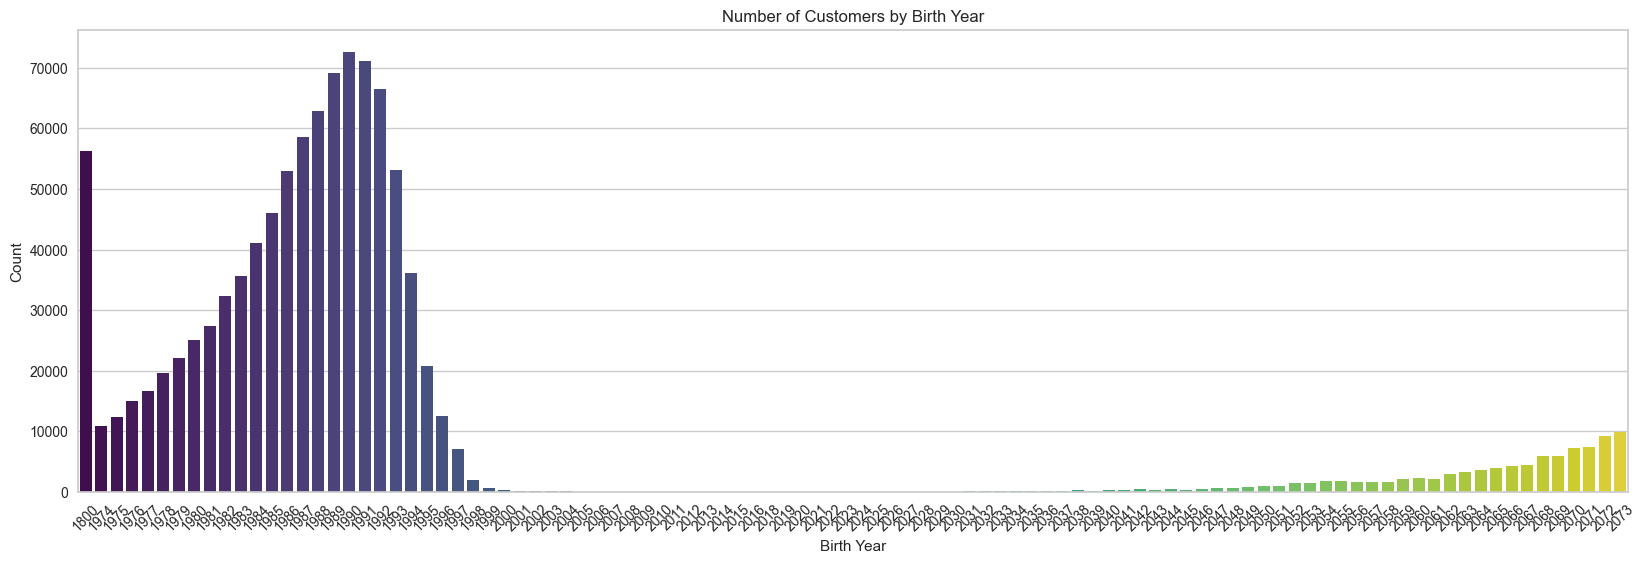

In [25]:
# Plot birth year count
plt.figure(figsize=(20, 6))
sns.countplot(data=data, x='BirthYear', palette='viridis')
plt.title('Number of Customers by Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [26]:
result = data.groupby('CustomerDOB').size().reset_index(name='count')
result = result.dropna().sort_values(by='count', ascending=False)
result

CustomerDOB  count
0      1800-01-01  56292
5477   1989-01-01    809
5842   1990-01-01    784
6365   1991-06-08    698
6207   1991-01-01    665
...           ...    ...
16023  2070-08-02      1
14509  2065-12-26      1
10020  2044-08-20      1
240    1974-08-29      1
10885  2050-11-15      1

[17233 rows x 2 columns]

In [27]:
#removing 1800-01-01	56292 values
data = data[data['CustomerDOB'] != '1800-01-01']

<Axes: xlabel='BirthYear'>

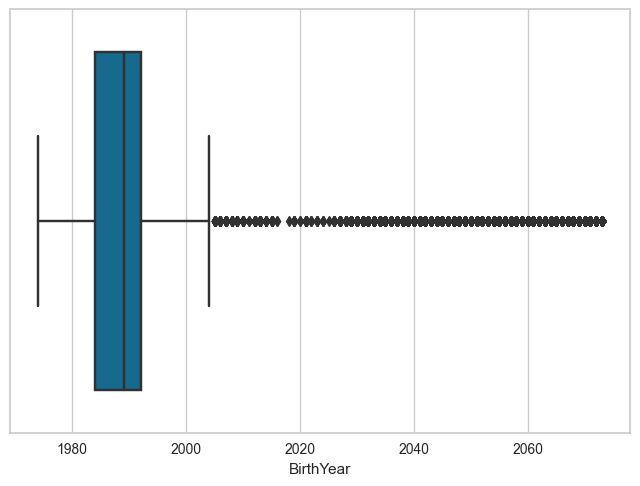

In [28]:
sns.boxplot(data = data,x = 'BirthYear')

### CustGender

In [29]:
data.CustGender.value_counts()

CustGender
M    712454
F    272868
Name: count, dtype: int64

In [30]:
data.drop((data[data["CustGender"]=="T"]).index,inplace= True)

### CustLocation

In [31]:
data.CustLocation.nunique()

8164

### TransactionDate

In [32]:
data['TransactionDate'].unique()


array(['2/8/16', '1/8/16', '3/8/16', '5/8/16', '4/8/16', '6/8/16',
       '9/8/16', '8/8/16', '12/8/16', '7/8/16', '21/10/16', '16/10/16',
       '10/8/16', '14/8/16', '17/8/16', '21/8/16', '19/8/16', '24/8/16',
       '22/8/16', '29/8/16', '22/9/16', '23/9/16', '13/8/16', '25/8/16',
       '28/8/16', '15/8/16', '27/8/16', '31/8/16', '20/8/16', '23/8/16',
       '30/8/16', '11/8/16', '16/8/16', '26/8/16', '27/9/16', '18/8/16',
       '25/9/16', '26/9/16', '30/9/16', '3/9/16', '2/9/16', '1/9/16',
       '6/9/16', '5/9/16', '4/9/16', '9/9/16', '8/9/16', '7/9/16',
       '12/9/16', '11/9/16', '10/9/16', '15/9/16', '14/9/16', '13/9/16',
       '18/9/16'], dtype=object)

In [33]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], infer_datetime_format=True)

In [34]:
data['TransactionYear'] =data['TransactionDate'].dt.year
data['TransactionMonth'] =data['TransactionDate'].dt.month

In [35]:
data['TransactionDay'] =data['TransactionDate'].dt.day
data['TransactionDay']

0           8
1           8
2           8
3           8
4           8
           ..
1048562    18
1048563    18
1048564    18
1048565    18
1048566    18
Name: TransactionDay, Length: 985322, dtype: int32

In [36]:
data['TransactionDoWeek'] =data['TransactionDate'].dt.day_of_week
data['TransactionDoWeek']
# 0-Monday
# 6-Sunday

0          0
1          0
2          0
3          0
4          0
          ..
1048562    6
1048563    6
1048564    6
1048565    6
1048566    6
Name: TransactionDoWeek, Length: 985322, dtype: int32

In [37]:
hour = [int(datetime.fromtimestamp(i).strftime("%H")) for i in data.TransactionTime.values]

# Categorizing Time Periods
time = []

# Iterate over each extracted hour
for i in hour:
    # Morning: hours between 0 (inclusive) and 12 (exclusive)
    if i >= 0 and i < 12:
        time.append("Morning")
    # Afternoon: hours between 12 (inclusive) and 17 (inclusive)
    elif i >= 12 and i <= 17:
        time.append("Afternoon")
    # Evening: hours between 17 (exclusive) and 19 (inclusive)
    elif i > 17 and i <= 19:
        time.append("Evening")
    # Night: hours greater than 19
    elif i > 19:
        time.append("Night")


In [38]:
data["TransactionHourOfDay"] = hour
data["TransactionTimeOfDay"] = time

In [39]:
data['TransactionYear'].nunique()

1

In [40]:
data

TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
0                  T1   C5841053  1994-10-01          F     JAMSHEDPUR   
1                  T2   C2142763  2057-04-04          M        JHAJJAR   
2                  T3   C4417068  1996-11-26          F         MUMBAI   
3                  T4   C5342380  2073-09-14          F         MUMBAI   
4                  T5   C9031234  1988-03-24          F    NAVI MUMBAI   
...               ...        ...         ...        ...            ...   
1048562      T1048563   C8020229  1990-08-04          M      NEW DELHI   
1048563      T1048564   C6459278  1992-02-20          M         NASHIK   
1048564      T1048565   C6412354  1989-05-18          M      HYDERABAD   
1048565      T1048566   C6420483  1978-08-30          M  VISAKHAPATNAM   
1048566      T1048567   C8337524  1984-05-03          M           PUNE   

         CustAccountBalance TransactionDate  TransactionTime  \
0                  17819.05      2016-02-08           143207   
1                   2270.69      2016-02-08           141858   
2                  17874.44      2016-02-08           142712   
3                 866503.21      2016-02-08           142714   
4                   6714.43      2016-02-08           181156   
...                     ...             ...              ...   
1048562             7635.19      2016-09-18           184824   
1048563            27311.42      2016-09-18           183734   
1048564           221757.06      2016-09-18           183313   
1048565            10117.87      2016-09-18           184706   
1048566            75734.42      2016-09-18           181222   

         TransactionAmount (INR)  BirthYear  TransactionYear  \
0                           25.0       1994             2016   
1                        27999.0       2057             2016   
2                          459.0       1996             2016   
3                         2060.0       2073             2016   
4                         1762.5       1988             2016   
...                          ...        ...              ...   
1048562                    799.0       1990             2016   
1048563                    460.0       1992             2016   
1048564                    770.0       1989             2016   
1048565                   1000.0       1978             2016   
1048566                   1166.0       1984             2016   

         TransactionMonth  TransactionDay  TransactionDoWeek  \
0                       2               8                  0   
1                       2               8                  0   
2                       2               8                  0   
3                       2               8                  0   
4                       2               8                  0   
...                   ...             ...                ...   
1048562                 9              18                  6   
1048563                 9              18                  6   
1048564                 9              18                  6   
1048565                 9              18                  6   
1048566                 9              18                  6   

         TransactionHourOfDay TransactionTimeOfDay  
0                          16            Afternoon  
1                          16            Afternoon  
2                          16            Afternoon  
3                          16            Afternoon  
4                           3              Morning  
...                       ...                  ...  
1048562                     4              Morning  
1048563                     4              Morning  
1048564                     3              Morning  
1048565                     4              Morning  
1048566                     3              Morning  

[985322 rows x 16 columns]

#I think some values in CustomerDOB was inserted or converted wrongly, for ex:1 instead of 2057, should be 1957

In [41]:
mask = data['TransactionYear'] < data['BirthYear']
data.loc[mask, 'BirthYear'] -= 100

In [42]:
data

TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
0                  T1   C5841053  1994-10-01          F     JAMSHEDPUR   
1                  T2   C2142763  2057-04-04          M        JHAJJAR   
2                  T3   C4417068  1996-11-26          F         MUMBAI   
3                  T4   C5342380  2073-09-14          F         MUMBAI   
4                  T5   C9031234  1988-03-24          F    NAVI MUMBAI   
...               ...        ...         ...        ...            ...   
1048562      T1048563   C8020229  1990-08-04          M      NEW DELHI   
1048563      T1048564   C6459278  1992-02-20          M         NASHIK   
1048564      T1048565   C6412354  1989-05-18          M      HYDERABAD   
1048565      T1048566   C6420483  1978-08-30          M  VISAKHAPATNAM   
1048566      T1048567   C8337524  1984-05-03          M           PUNE   

         CustAccountBalance TransactionDate  TransactionTime  \
0                  17819.05      2016-02-08           143207   
1                   2270.69      2016-02-08           141858   
2                  17874.44      2016-02-08           142712   
3                 866503.21      2016-02-08           142714   
4                   6714.43      2016-02-08           181156   
...                     ...             ...              ...   
1048562             7635.19      2016-09-18           184824   
1048563            27311.42      2016-09-18           183734   
1048564           221757.06      2016-09-18           183313   
1048565            10117.87      2016-09-18           184706   
1048566            75734.42      2016-09-18           181222   

         TransactionAmount (INR)  BirthYear  TransactionYear  \
0                           25.0       1994             2016   
1                        27999.0       1957             2016   
2                          459.0       1996             2016   
3                         2060.0       1973             2016   
4                         1762.5       1988             2016   
...                          ...        ...              ...   
1048562                    799.0       1990             2016   
1048563                    460.0       1992             2016   
1048564                    770.0       1989             2016   
1048565                   1000.0       1978             2016   
1048566                   1166.0       1984             2016   

         TransactionMonth  TransactionDay  TransactionDoWeek  \
0                       2               8                  0   
1                       2               8                  0   
2                       2               8                  0   
3                       2               8                  0   
4                       2               8                  0   
...                   ...             ...                ...   
1048562                 9              18                  6   
1048563                 9              18                  6   
1048564                 9              18                  6   
1048565                 9              18                  6   
1048566                 9              18                  6   

         TransactionHourOfDay TransactionTimeOfDay  
0                          16            Afternoon  
1                          16            Afternoon  
2                          16            Afternoon  
3                          16            Afternoon  
4                           3              Morning  
...                       ...                  ...  
1048562                     4              Morning  
1048563                     4              Morning  
1048564                     3              Morning  
1048565                     4              Morning  
1048566                     3              Morning  

[985322 rows x 16 columns]

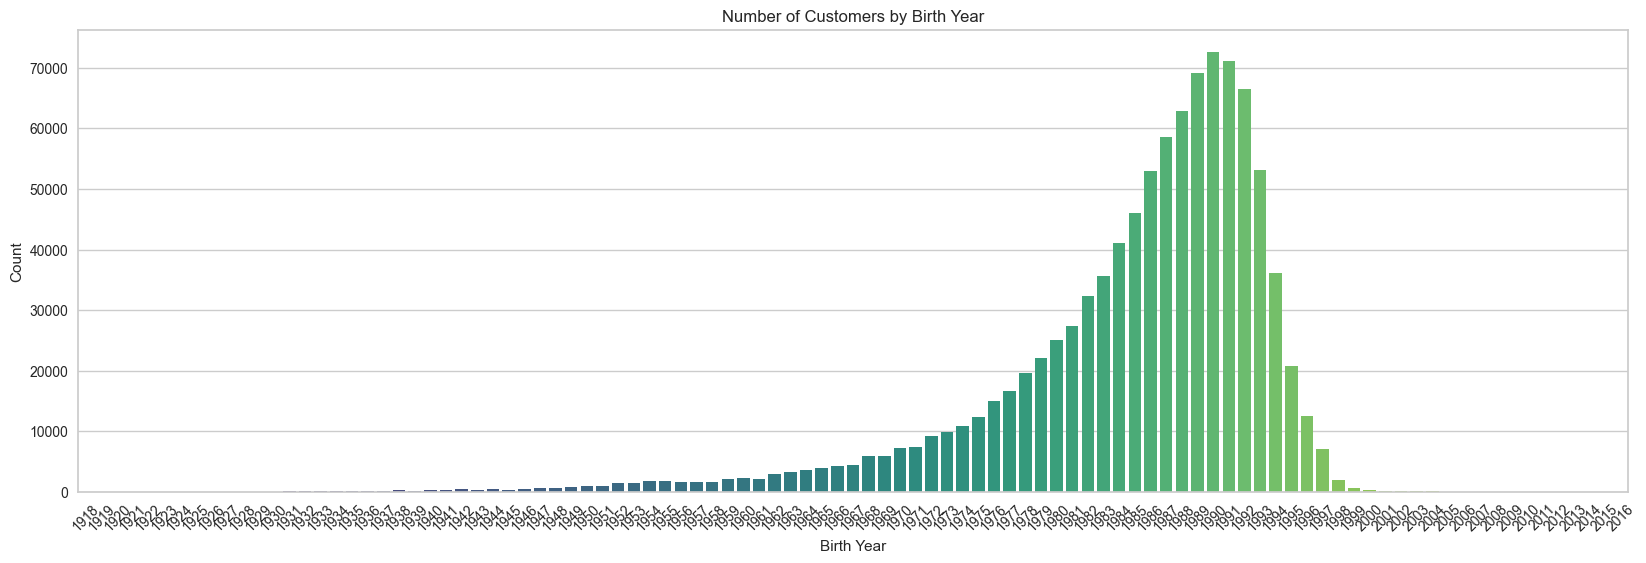

In [43]:
# Plot birth year count
plt.figure(figsize=(20, 6))
sns.countplot(data=data, x='BirthYear', palette='viridis')
plt.title('Number of Customers by Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### CustomerAge

In [44]:
data['CustomerAge']= data['TransactionYear']-data['BirthYear']
data

TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
0                  T1   C5841053  1994-10-01          F     JAMSHEDPUR   
1                  T2   C2142763  2057-04-04          M        JHAJJAR   
2                  T3   C4417068  1996-11-26          F         MUMBAI   
3                  T4   C5342380  2073-09-14          F         MUMBAI   
4                  T5   C9031234  1988-03-24          F    NAVI MUMBAI   
...               ...        ...         ...        ...            ...   
1048562      T1048563   C8020229  1990-08-04          M      NEW DELHI   
1048563      T1048564   C6459278  1992-02-20          M         NASHIK   
1048564      T1048565   C6412354  1989-05-18          M      HYDERABAD   
1048565      T1048566   C6420483  1978-08-30          M  VISAKHAPATNAM   
1048566      T1048567   C8337524  1984-05-03          M           PUNE   

         CustAccountBalance TransactionDate  TransactionTime  \
0                  17819.05      2016-02-08           143207   
1                   2270.69      2016-02-08           141858   
2                  17874.44      2016-02-08           142712   
3                 866503.21      2016-02-08           142714   
4                   6714.43      2016-02-08           181156   
...                     ...             ...              ...   
1048562             7635.19      2016-09-18           184824   
1048563            27311.42      2016-09-18           183734   
1048564           221757.06      2016-09-18           183313   
1048565            10117.87      2016-09-18           184706   
1048566            75734.42      2016-09-18           181222   

         TransactionAmount (INR)  BirthYear  TransactionYear  \
0                           25.0       1994             2016   
1                        27999.0       1957             2016   
2                          459.0       1996             2016   
3                         2060.0       1973             2016   
4                         1762.5       1988             2016   
...                          ...        ...              ...   
1048562                    799.0       1990             2016   
1048563                    460.0       1992             2016   
1048564                    770.0       1989             2016   
1048565                   1000.0       1978             2016   
1048566                   1166.0       1984             2016   

         TransactionMonth  TransactionDay  TransactionDoWeek  \
0                       2               8                  0   
1                       2               8                  0   
2                       2               8                  0   
3                       2               8                  0   
4                       2               8                  0   
...                   ...             ...                ...   
1048562                 9              18                  6   
1048563                 9              18                  6   
1048564                 9              18                  6   
1048565                 9              18                  6   
1048566                 9              18                  6   

         TransactionHourOfDay TransactionTimeOfDay  CustomerAge  
0                          16            Afternoon           22  
1                          16            Afternoon           59  
2                          16            Afternoon           20  
3                          16            Afternoon           43  
4                           3              Morning           28  
...                       ...                  ...          ...  
1048562                     4              Morning           26  
1048563                     4              Morning           24  
1048564                     3              Morning           27  
1048565                     4              Morning           38  
1048566                     3              Morning           32  

[985322 rows x 17 c

In [45]:
data.describe()

CustomerDOB  CustAccountBalance  \
count                         985322        9.853220e+05   
mean   1994-12-28 03:38:06.155388800        1.060612e+05   
min              1974-01-01 00:00:00        0.000000e+00   
25%              1984-09-16 00:00:00        4.582132e+03   
50%              1989-03-14 00:00:00        1.600630e+04   
75%              1992-09-09 00:00:00        5.375908e+04   
max              2073-12-31 00:00:00        1.150355e+08   
std                              NaN        8.179054e+05   

                     TransactionDate  TransactionTime  \
count                         985322    985322.000000   
mean   2016-07-25 15:35:09.904376832    157434.409364   
min              2016-01-08 00:00:00         0.000000   
25%              2016-06-09 00:00:00    124242.000000   
50%              2016-08-20 00:00:00    164625.000000   
75%              2016-09-09 00:00:00    200151.000000   
max              2016-12-09 00:00:00    235959.000000   
std                              NaN     51270.673224   

       TransactionAmount (INR)      BirthYear  TransactionYear  \
count             9.853220e+05  985322.000000         985322.0   
mean              1.452425e+03    1984.970463           2016.0   
min               0.000000e+00    1918.000000           2016.0   
25%               1.510000e+02    1982.000000           2016.0   
50%               4.310000e+02    1987.000000           2016.0   
75%               1.125000e+03    1991.000000           2016.0   
max               1.560035e+06    2016.000000           2016.0   
std               6.139765e+03       8.757113              0.0   

       TransactionMonth  TransactionDay  TransactionDoWeek  \
count     985322.000000   985322.000000      985322.000000   
mean           7.349036       14.409463           2.999948   
min            1.000000        8.000000           0.000000   
25%            6.000000        8.000000           1.000000   
50%            8.000000        9.000000           3.000000   
75%            9.000000       20.000000           5.000000   
max           12.000000       31.000000           6.000000   
std            2.633786        7.284729           1.981179   

       TransactionHourOfDay    CustomerAge  
count         985322.000000  985322.000000  
mean              10.385420      31.029537  
min                0.000000       0.000000  
25%                5.000000      25.000000  
50%               10.000000      29.000000  
75%               15.000000      34.000000  
max               23.000000      98.000000  
std                6.323413       8.757113

## CustAccountBalance

In [153]:
t_0= data[data['CustAccountBalance'] == 0].shape[0]
t_0

2106

## TransactionAmount (INR)

In [46]:
t_0= data[data['TransactionAmount (INR)'] == 0].shape[0]
t_0
#708 rows no transaction

708

In [47]:
data.corr(numeric_only=True)

CustAccountBalance  TransactionTime  \
CustAccountBalance                 1.000000        -0.003200   
TransactionTime                   -0.003200         1.000000   
TransactionAmount (INR)            0.060988         0.010804   
BirthYear                         -0.122429        -0.000328   
TransactionYear                         NaN              NaN   
TransactionMonth                   0.001901        -0.002842   
TransactionDay                     0.009203         0.018147   
TransactionDoWeek                  0.002112         0.004580   
TransactionHourOfDay               0.003244         0.090158   
CustomerAge                        0.122429         0.000328   

                         TransactionAmount (INR)  BirthYear  TransactionYear  \
CustAccountBalance                      0.060988  -0.122429              NaN   
TransactionTime                         0.010804  -0.000328              NaN   
TransactionAmount (INR)                 1.000000  -0.102626              NaN   
BirthYear                              -0.102626   1.000000              NaN   
TransactionYear                              NaN        NaN              NaN   
TransactionMonth                       -0.002765  -0.005782              NaN   
TransactionDay                         -0.003135  -0.020098              NaN   
TransactionDoWeek                       0.002727  -0.005575              NaN   
TransactionHourOfDay                    0.002901   0.003602              NaN   
CustomerAge                             0.102626  -1.000000              NaN   

                         TransactionMonth  TransactionDay  TransactionDoWeek  \
CustAccountBalance               0.001901        0.009203           0.002112   
TransactionTime                 -0.002842        0.018147           0.004580   
TransactionAmount (INR)         -0.002765       -0.003135           0.002727   
BirthYear                       -0.005782       -0.020098          -0.005575   
TransactionYear                       NaN             NaN                NaN   
TransactionMonth                 1.000000        0.260516           0.059831   
TransactionDay                   0.260516        1.000000          -0.019879   
TransactionDoWeek                0.059831       -0.019879           1.000000   
TransactionHourOfDay             0.002270        0.003050           0.006669   
CustomerAge                      0.005782        0.020098           0.005575   

                         TransactionHourOfDay  CustomerAge  
CustAccountBalance                   0.003244     0.122429  
TransactionTime                      0.090158     0.000328  
TransactionAmount (INR)              0.002901     0.102626  
BirthYear                            0.003602    -1.000000  
TransactionYear                           NaN          NaN  
TransactionMonth                     0.002270     0.005782  
TransactionDay                       0.003050     0.020098  
TransactionDoWeek                    0.006669     0.005575  
TransactionHourOfDay                 1.000000    -0.003602  
CustomerAge                         -0.003602     1.000000

# EDA

In [ ]:
# Gender counts
Gender_counts = data.groupby('CustGender').size()

# Group Transaction by Transaction dates
transaction_counts = data.groupby(['TransactionDate', 'CustGender']).size().unstack().fillna(0)

# Convert the index (dates) to datetime format for better plotting
transaction_counts.index = pd.to_datetime(transaction_counts.index)



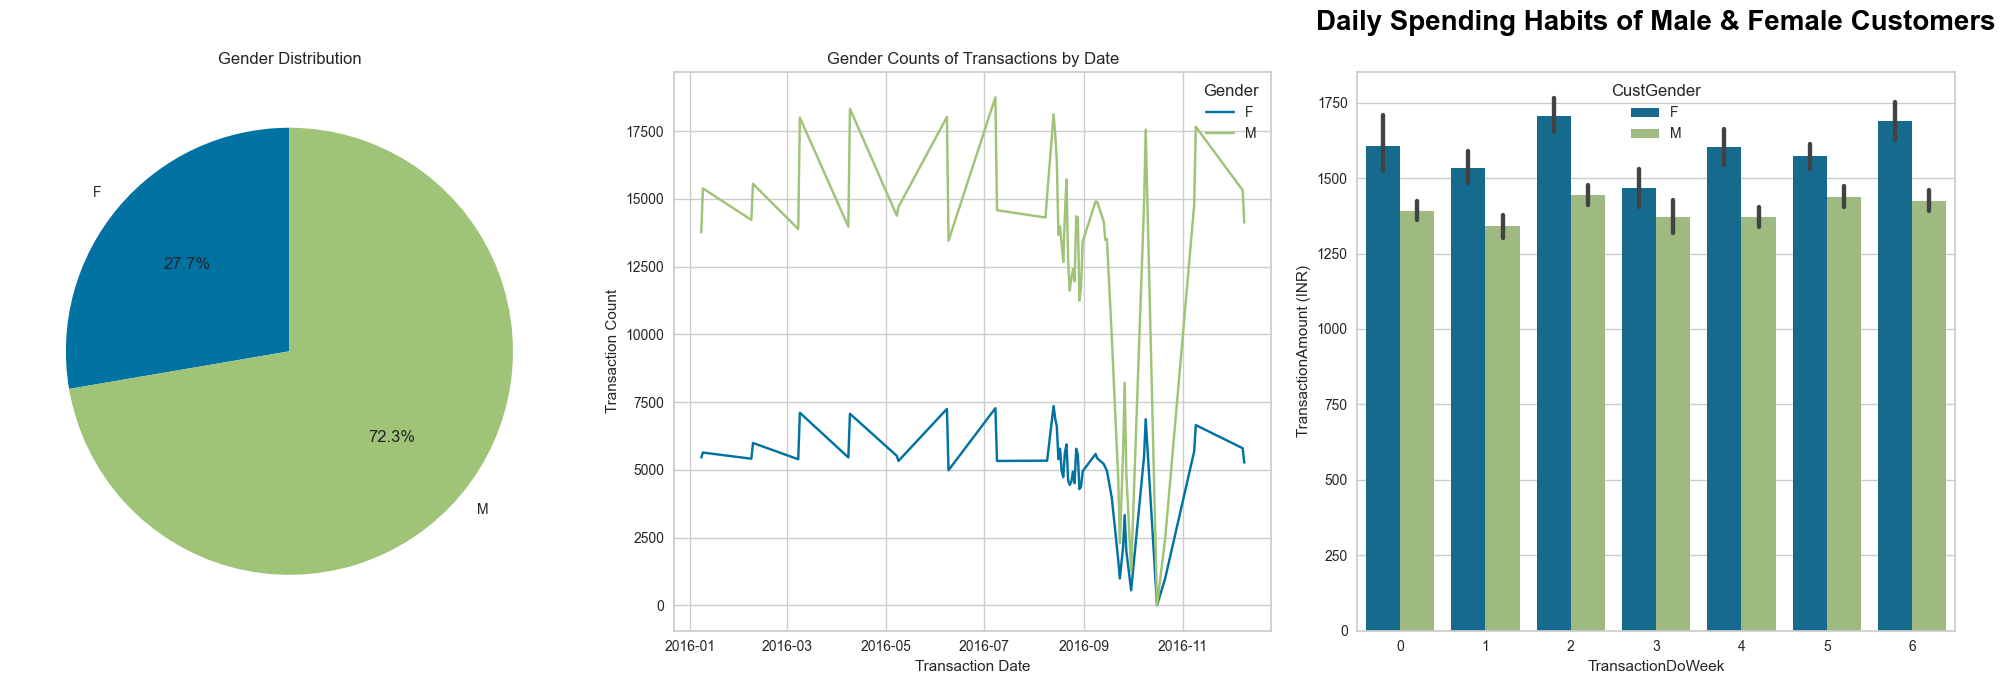

In [ ]:
# Create a subplot with three plots on the same line
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

# Adjust the height space between subplots
plt.subplots_adjust(wspace=0.4)

# Plot Gender counts as a pie chart
ax1.pie(Gender_counts, labels=Gender_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Gender Distribution')

# Plot Transaction counts as a line chart
for gender in transaction_counts.columns:
    ax2.plot(transaction_counts.index, transaction_counts[gender], label=gender)

ax2.set_title('Gender Counts of Transactions by Date')
ax2.set_xlabel('Transaction Date')
ax2.set_ylabel('Transaction Count')
ax2.legend(title='Gender', loc='upper right')
ax2.grid(True)

# Plot Weekday-Wise Comparison of Spending Habits of Male & Female Customers
sns.barplot(data=data, x='TransactionDoWeek', y='TransactionAmount (INR)',  hue='CustGender', ax=ax3)
ax3.set_title('Daily Spending Habits of Male & Female Customers', fontsize=20, fontweight='bold', color='black', pad=30)

plt.tight_layout()
plt.show()


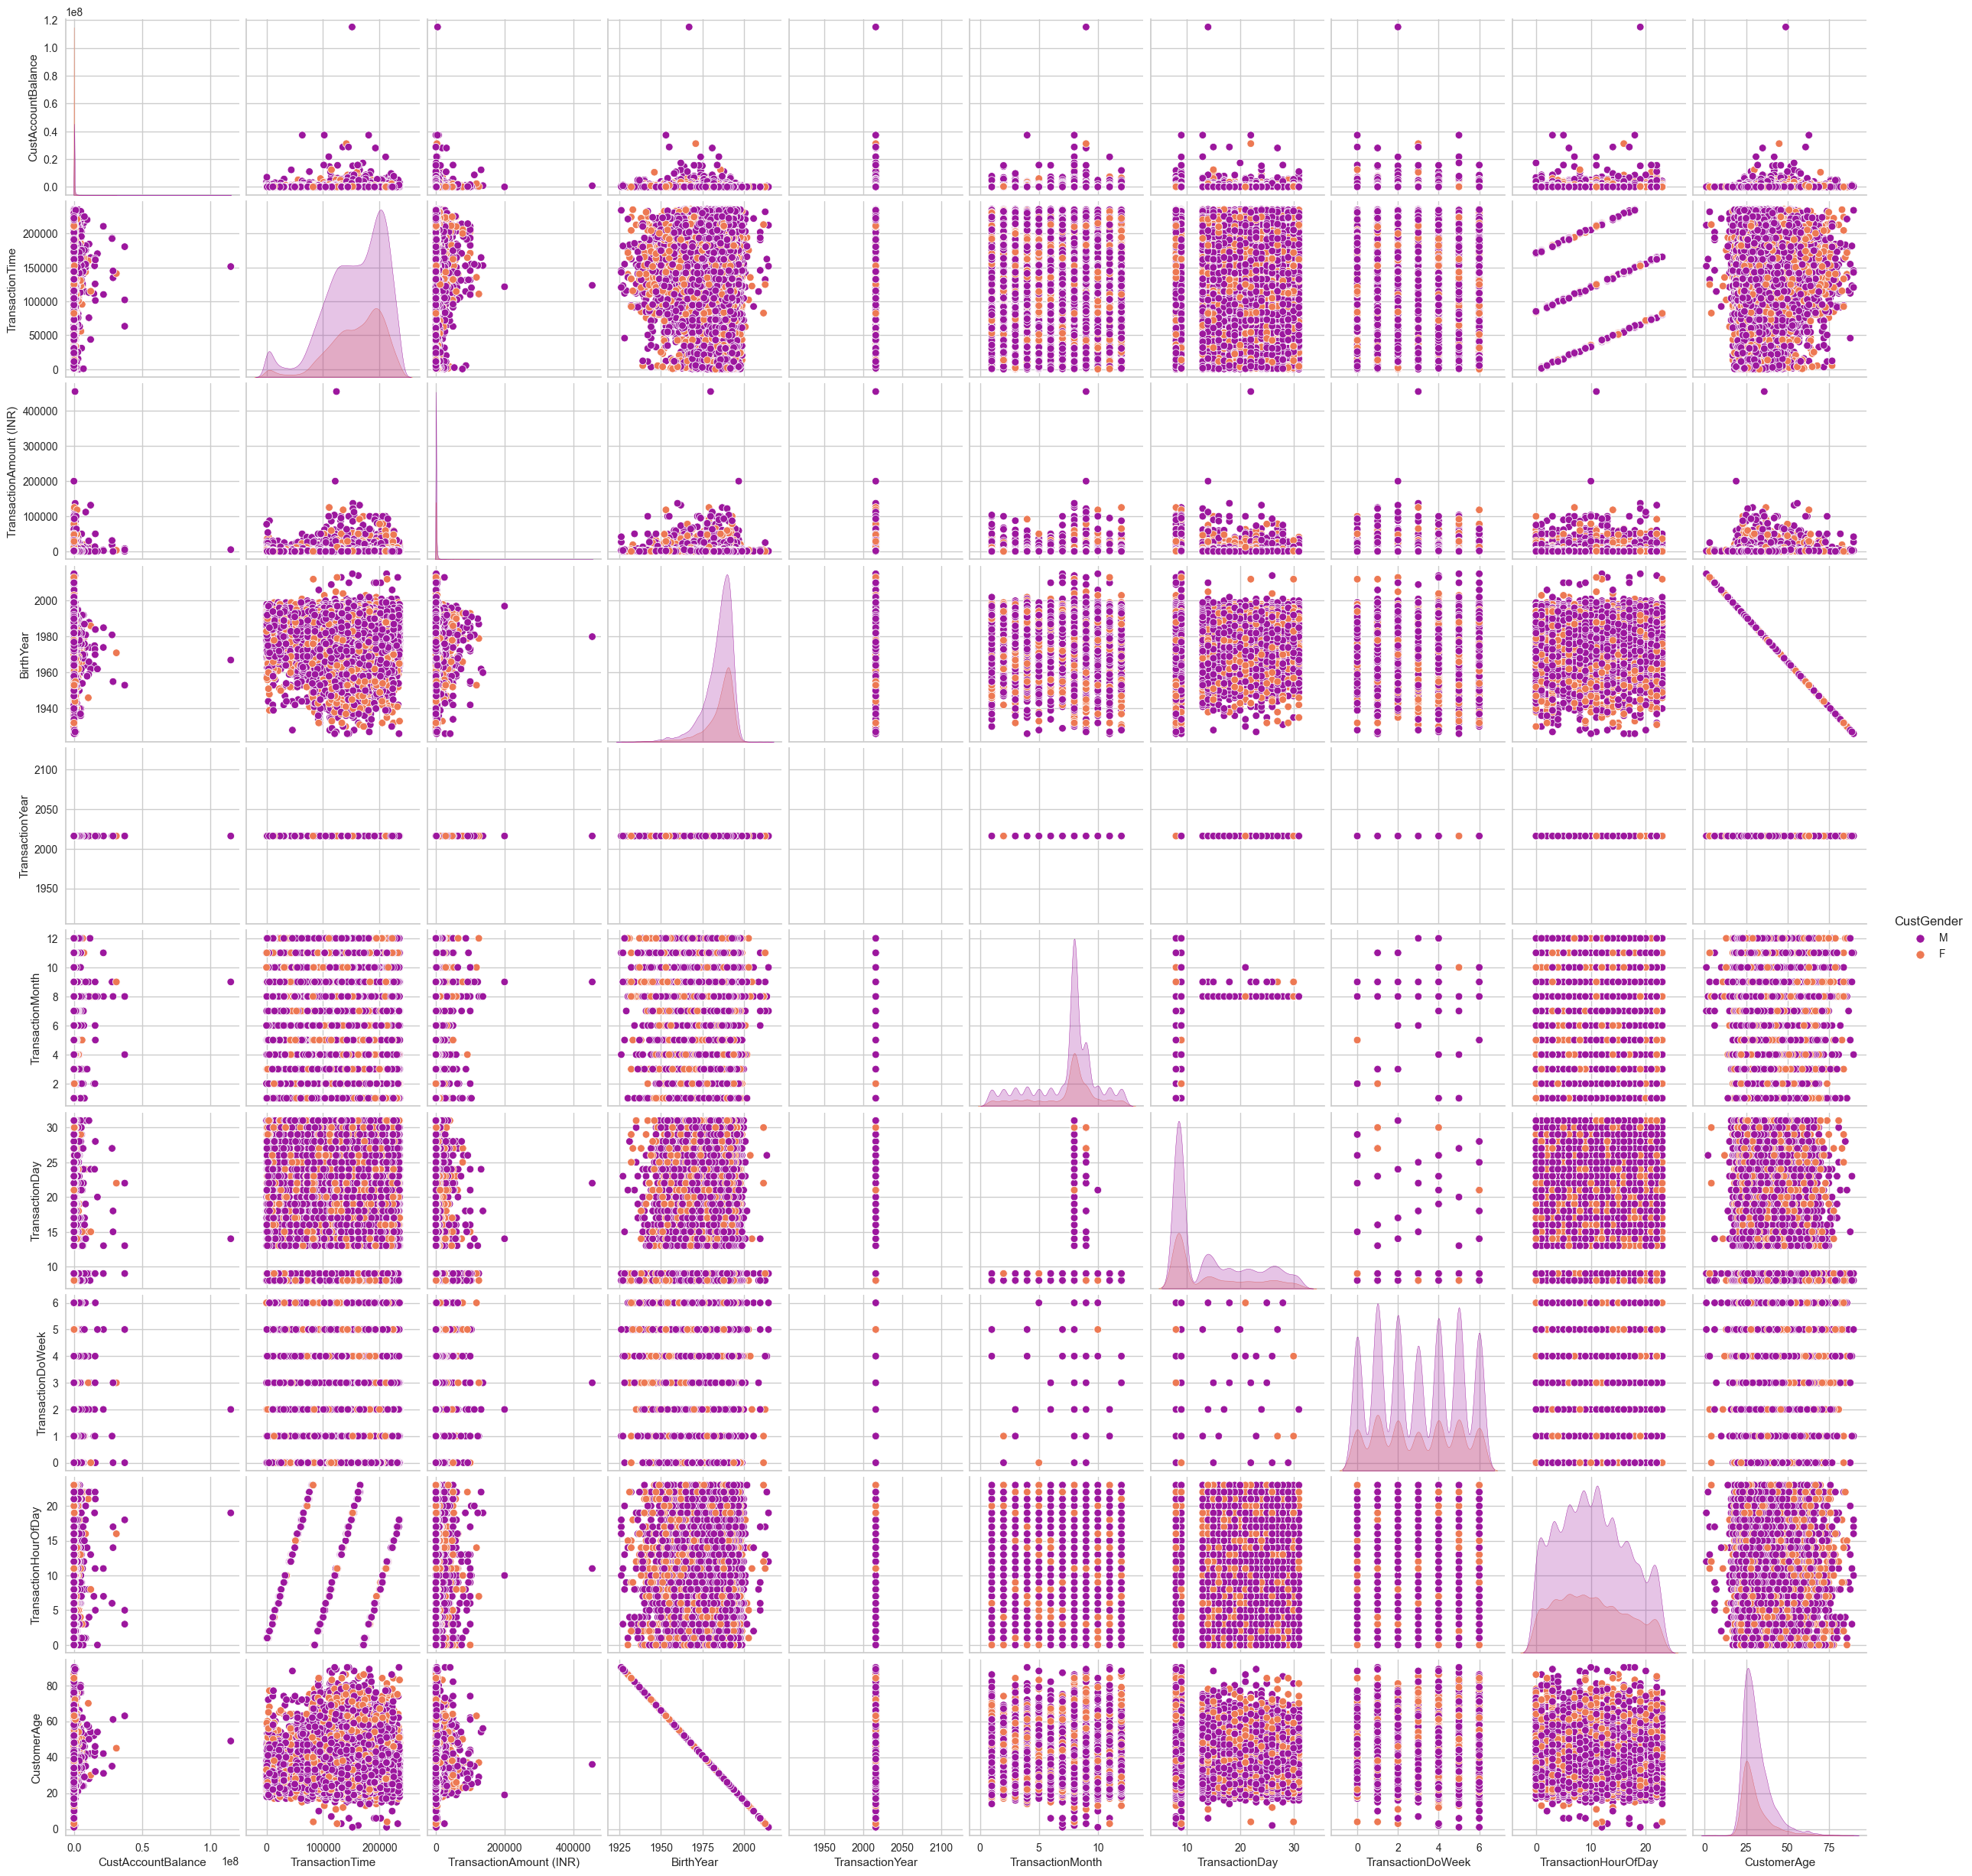

In [ ]:
sns.pairplot(data.sample(n=50000),hue='CustGender',palette='plasma')

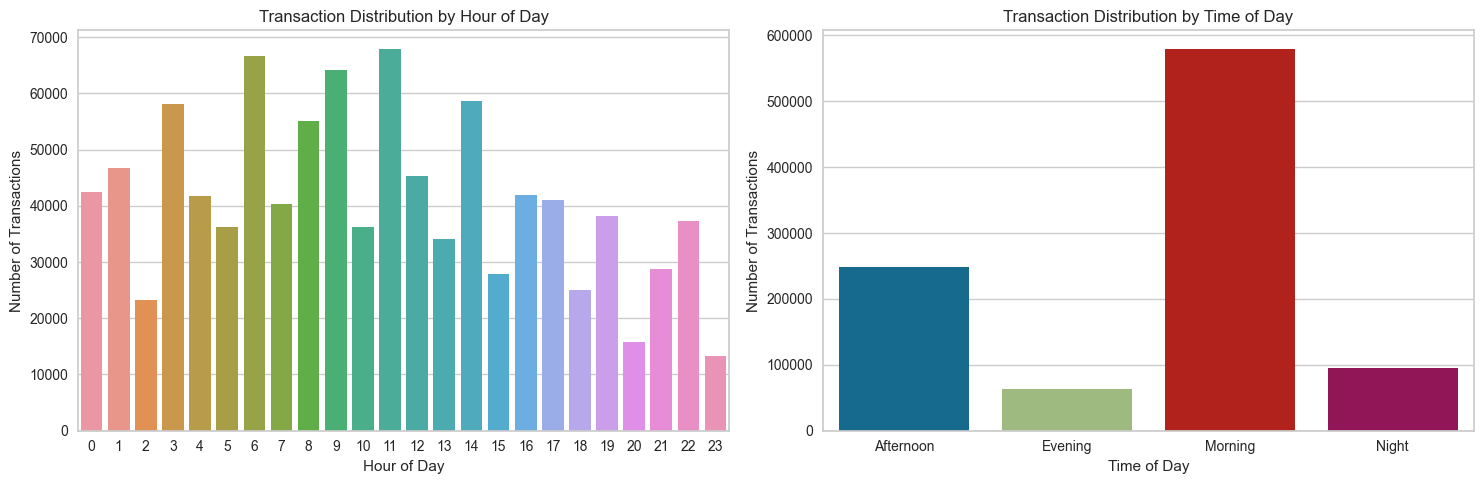

In [ ]:
# Count the number of transactions for each hour of the day
hour_counts = data.groupby('TransactionHourOfDay').size().reset_index(name='TransactionCountByHour')

# Count the number of transactions for each time of the day
time_counts = data.groupby('TransactionTimeOfDay').size().reset_index(name='TransactionCountByTime')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot for TransactionHourOfDay
sns.barplot(x='TransactionHourOfDay', y='TransactionCountByHour', data=hour_counts, ax=axes[0])
axes[0].set_title('Transaction Distribution by Hour of Day')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Number of Transactions')

# Bar plot for TransactionTimeOfDay
sns.barplot(x='TransactionTimeOfDay', y='TransactionCountByTime', data=time_counts, ax=axes[1])
axes[1].set_title('Transaction Distribution by Time of Day')
axes[1].set_xlabel('Time of Day')
axes[1].set_ylabel('Number of Transactions')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# Group Transaction by Transaction dates
age_counts = data.groupby(['CustomerAge', 'TransactionDate']).size().unstack().fillna(0)

# Select the top 4 values based on 'CustAccountBalance' and drop duplicate ages
top_4_values_unique_age = data.loc[data.groupby('CustomerAge')['CustAccountBalance'].idxmax()].nlargest(4, 'CustAccountBalance')

# Select a few age groups for better readability
selected_age_groups = age_counts.sum(axis=1).nlargest(5, keep='all').index
selected_age_groups
# the index labels of the top 5 age groups based on the sum of transaction counts across all transaction dates

Index([26, 25, 27, 24, 28], dtype='int32', name='CustomerAge')

In [ ]:
top_4_values_unique_age


TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0        T40983   C2916865  2067-03-08          M     SHILLONG   
1       T488302   C2014414  2031-04-07          F      GURGAON   
2       T789796   C6826860  2064-10-04          M      TIRUPUR   
3       T749354   C8217728  2069-10-12          M       MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0        1.150355e+08      2016-09-27           224912   
1        8.224463e+07      2016-08-20           111032   
2        6.979933e+07      2016-05-09           102037   
3        6.138221e+07      2016-02-09           233715   

   TransactionAmount (INR)  BirthYear  TransactionYear  TransactionMonth  \
0                   6959.0       1967             2016                 9   
1                  20478.0       1931             2016                 8   
2                 100000.0       1964             2016                 5   
3                 724122.0       1969             2016                 2   

   TransactionDay  TransactionDoWeek  TransactionHourOfDay  \
0              27                  1                    15   
1              20                  5                     7   
2               9                  0                     5   
3               9                  1                    17   

  TransactionTimeOfDay  CustomerAge  
0            Afternoon           49  
1              Morning           85  
2              Morning           52  
3            Afternoon           47

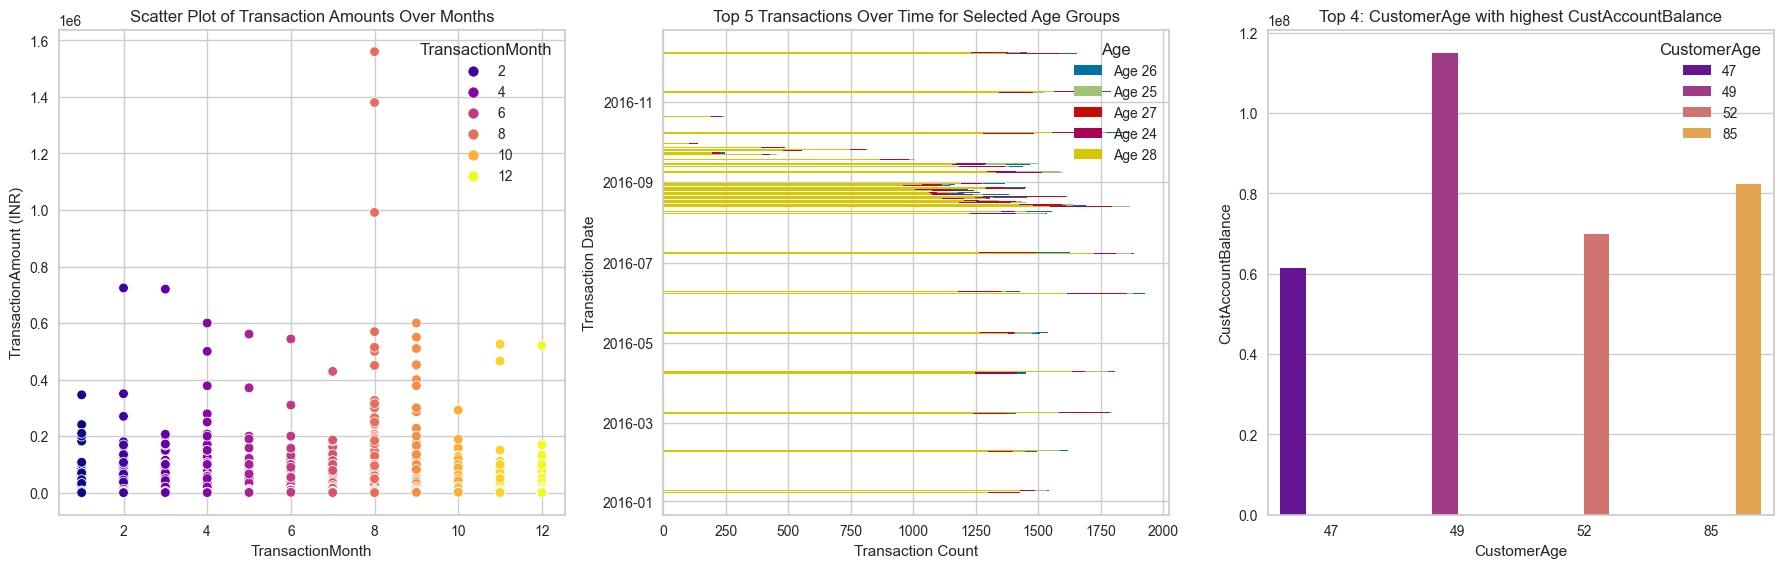

In [ ]:
# Assuming 'age_counts' is your DataFrame with age group counts
plt.figure(figsize=(18, 6))

# Scatter plot on the left axis
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='TransactionMonth', y='TransactionAmount (INR)', hue='TransactionMonth', palette='plasma')
plt.title('Scatter Plot of Transaction Amounts Over Months')

# Horizontal bar chart for selected age groups in the middle axis
plt.subplot(1, 3, 2)
for age_group in selected_age_groups:
    plt.barh(age_counts.columns, age_counts.loc[age_group], label=f'Age {age_group}', alpha=1)

plt.title('Top 5 Transactions Over Time for Selected Age Groups')
plt.xlabel('Transaction Count')
plt.ylabel('Transaction Date')
plt.legend(title='Age', loc='upper right')

# Bar plot for top 4 values on the right axis
plt.subplot(1, 3, 3)
sns.barplot(data=top_4_values_unique_age, x='CustomerAge', y='CustAccountBalance', hue='CustomerAge', palette='plasma')
plt.title('Top 4: CustomerAge with highest CustAccountBalance')

plt.tight_layout()
plt.show()


In [ ]:
# find top customer locations
locations = data['CustLocation'].value_counts().nlargest(10)

# Calculate transaction volumes for each city
avg_transaction = data.groupby('CustLocation')['TransactionAmount (INR)'].mean()

city_transaction_volumes = avg_transaction.nlargest(10)


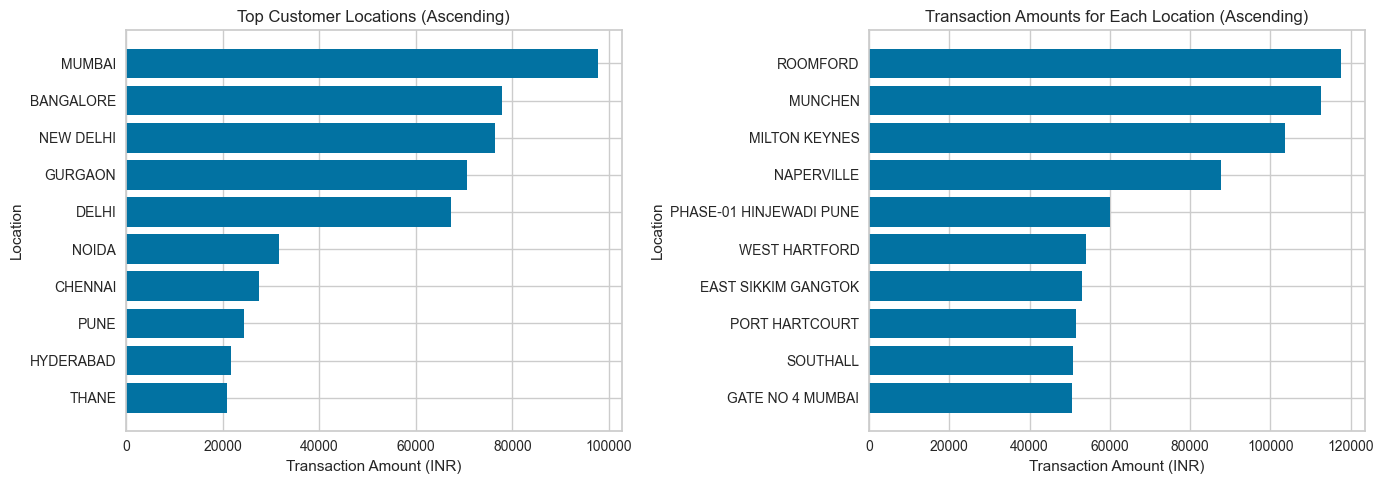

In [ ]:
import matplotlib.pyplot as plt

# Sorting data
locations_sorted = locations.sort_values()
city_transaction_volumes_sorted = city_transaction_volumes.sort_values()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot top customer locations in ascending order
axes[0].barh(locations_sorted.index, locations_sorted.values)  
axes[0].set_title('Top Customer Locations (Ascending)')
axes[0].set_xlabel('Transaction Amount (INR)')
axes[0].set_ylabel('Location')
axes[0].tick_params(axis='y', rotation=0)

# Plot Average transaction volumes for each location in ascending order
axes[1].barh(city_transaction_volumes_sorted.index, city_transaction_volumes_sorted.values)  
axes[1].set_title('Transaction Amounts for Each Location (Ascending)')
axes[1].set_xlabel('Transaction Amount (INR)')
axes[1].set_ylabel('Location')
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
num_col = data.select_dtypes(include=np.number)
cat_col = data.select_dtypes(exclude=np.number)
num_col

CustAccountBalance  TransactionTime  TransactionAmount (INR)  \
0                  17819.05           143207                     25.0   
1                   2270.69           141858                  27999.0   
2                  17874.44           142712                    459.0   
3                 866503.21           142714                   2060.0   
4                   6714.43           181156                   1762.5   
...                     ...              ...                      ...   
1048562             7635.19           184824                    799.0   
1048563            27311.42           183734                    460.0   
1048564           221757.06           183313                    770.0   
1048565            10117.87           184706                   1000.0   
1048566            75734.42           181222                   1166.0   

         BirthYear  TransactionYear  TransactionMonth  TransactionDay  \
0             1994             2016                 2               8   
1             1957             2016                 2               8   
2             1996             2016                 2               8   
3             1973             2016                 2               8   
4             1988             2016                 2               8   
...            ...              ...               ...             ...   
1048562       1990             2016                 9              18   
1048563       1992             2016                 9              18   
1048564       1989             2016                 9              18   
1048565       1978             2016                 9              18   
1048566       1984             2016                 9              18   

         TransactionDoWeek  TransactionHourOfDay  CustomerAge  
0                        0                    16           22  
1                        0                    16           59  
2                        0                    16           20  
3                        0                    16           43  
4                        0                     3           28  
...                    ...                   ...          ...  
1048562                  6                     4           26  
1048563                  6                     4           24  
1048564                  6                     3           27  
1048565                  6                     4           38  
1048566                  6                     3           32  

[985322 rows x 10 columns]

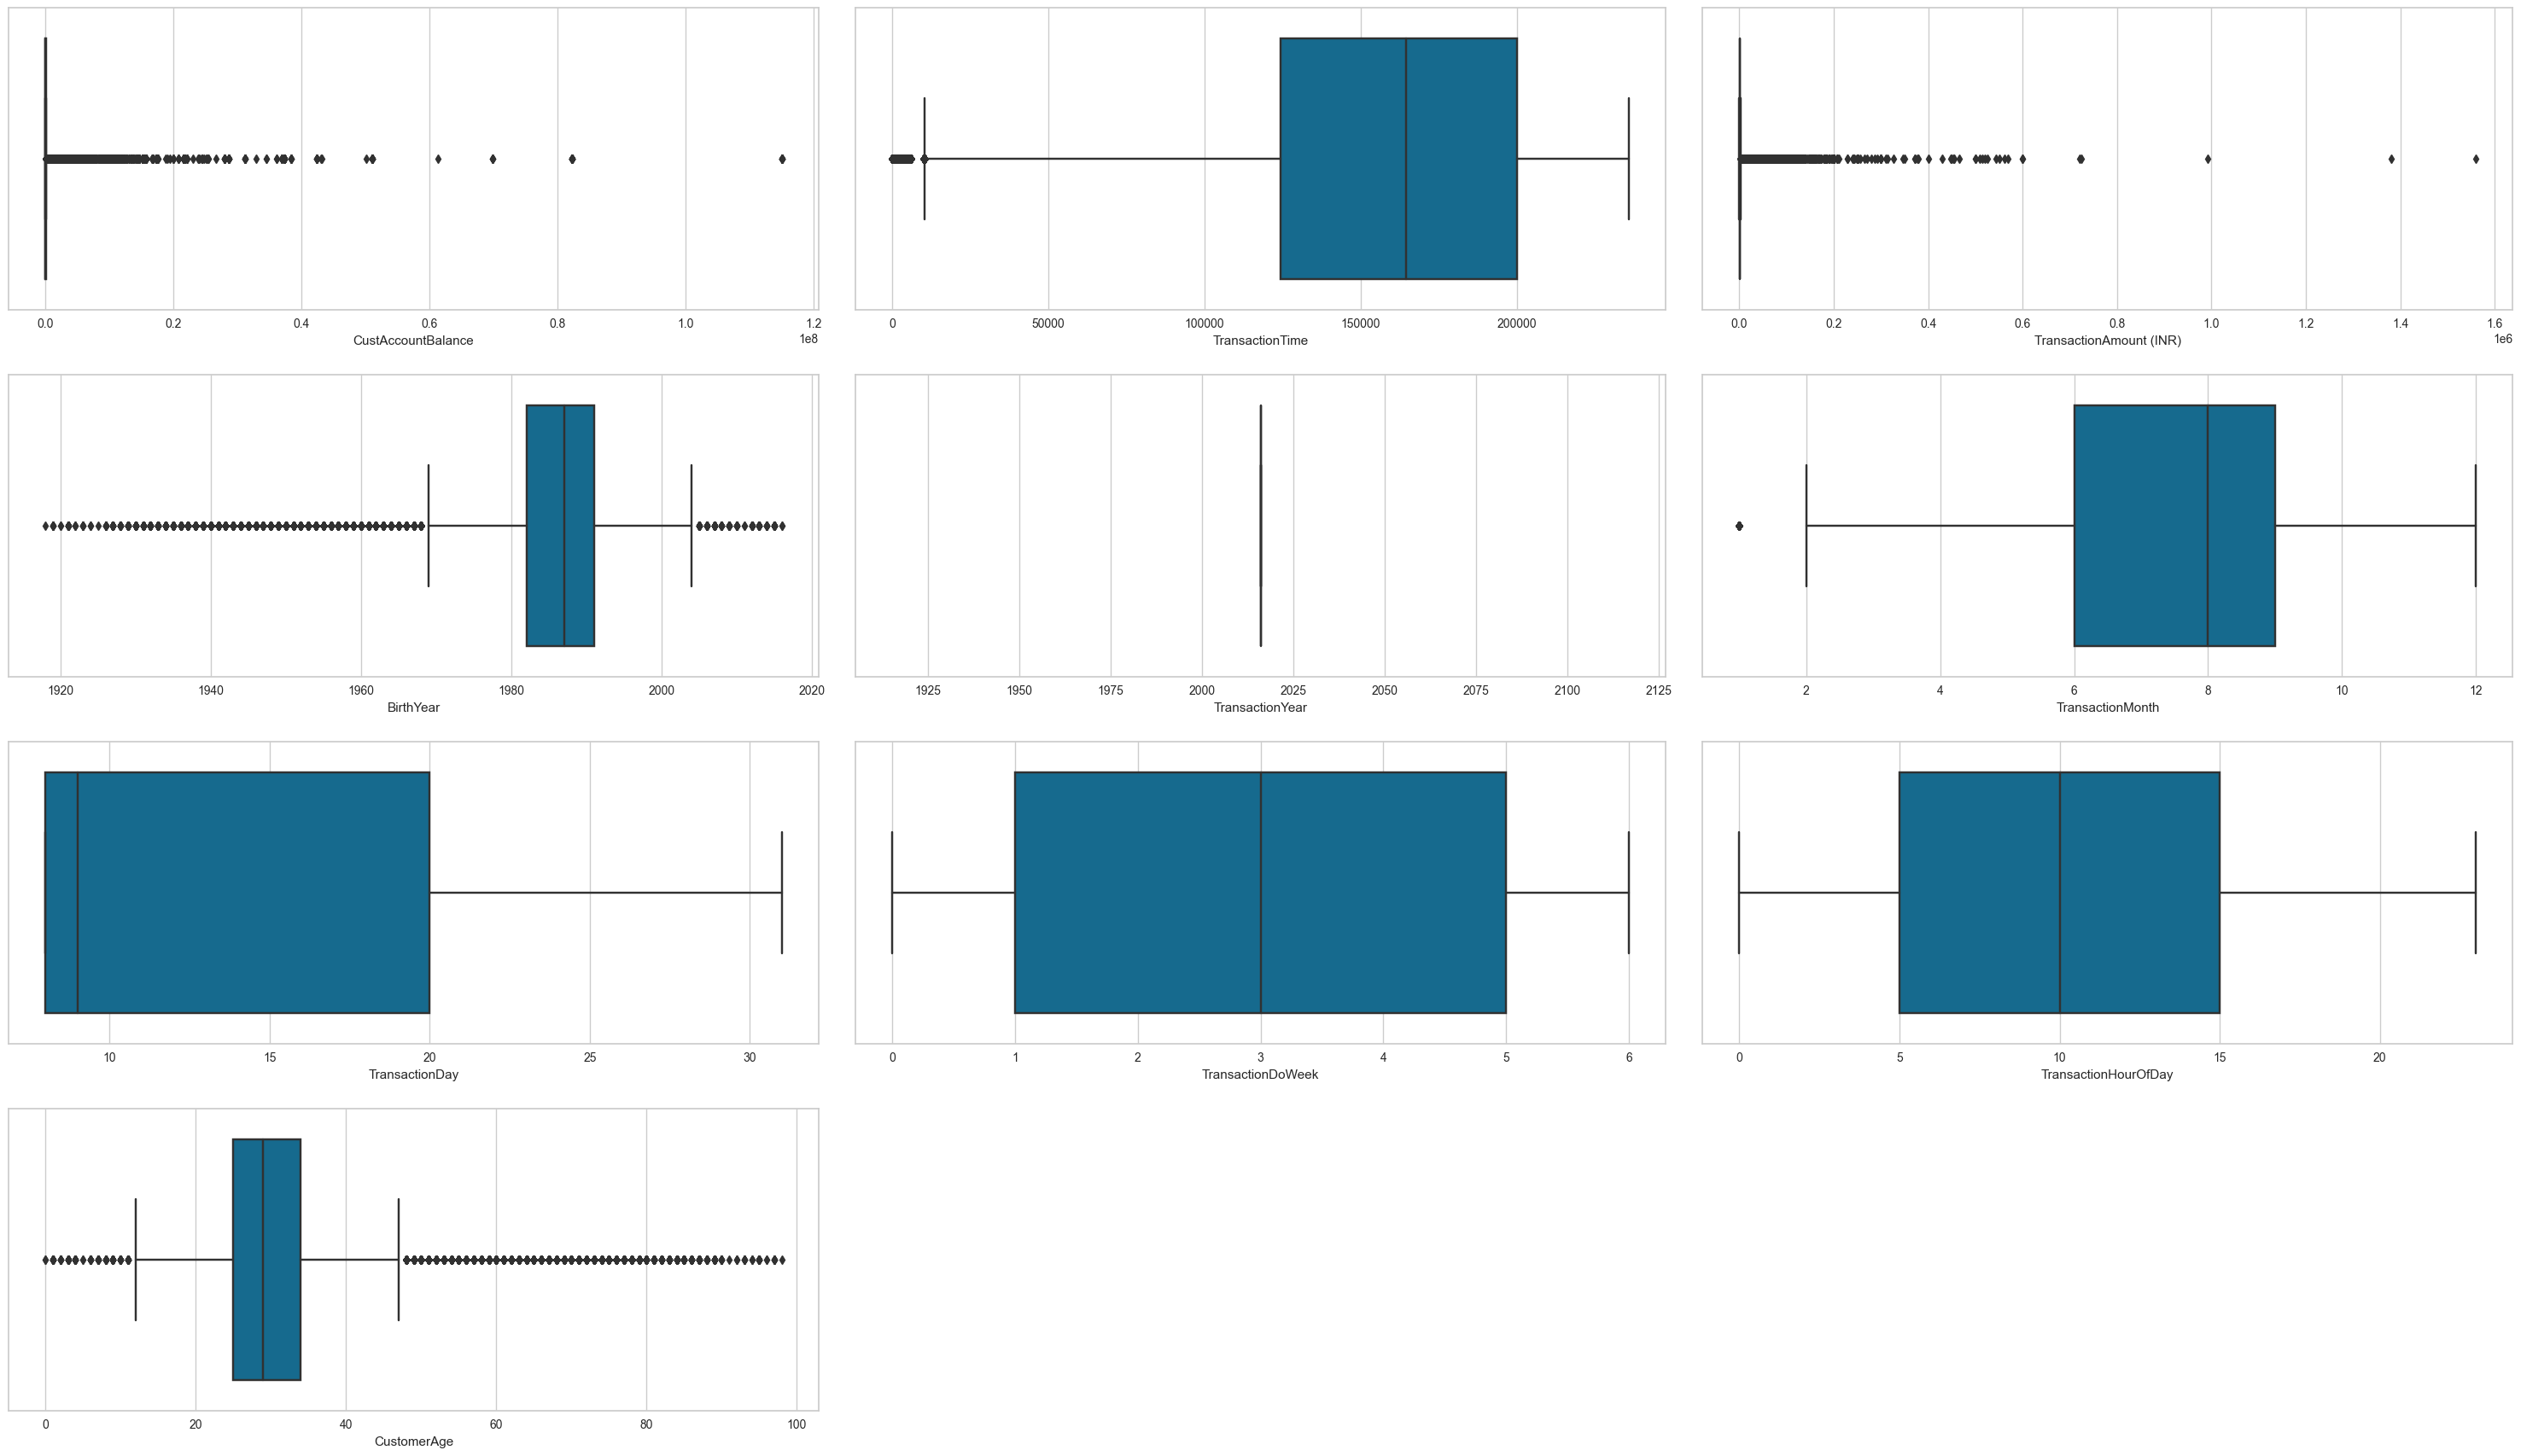

In [ ]:
plt.figure(figsize=(30,30))
for index,column in enumerate(num_col):
    plt.subplot(7,3,index+1)
    sns.boxplot(data=num_col,x=column)
    
plt.tight_layout(pad = 2.0)

# RFM Analysis

In [71]:

data['TransactionDate1']=data['TransactionDate'] # ==> to calculate the minimum (first transaction)
data['TransactionDate2']=data['TransactionDate'] # ==> to calculate the maximum (last transaction)


In [72]:
# Create RFM_data DataFrame
RFM_data = data.groupby("CustomerID").agg({
    "TransactionID": "count",
    "CustGender": "first",
    "CustLocation": "first",
    "CustAccountBalance": "mean",
    "TransactionAmount (INR)": "mean",
    "CustomerAge": "median",
    "TransactionDate2": "max",
    "TransactionDate1": "min",
    "TransactionDate": "median"
})

RFM_data = RFM_data.reset_index()
RFM_data.head()


CustomerID  TransactionID CustGender CustLocation  CustAccountBalance  \
0   C1010011              2          F        NOIDA           76340.635   
1   C1010012              1          M       MUMBAI           24204.490   
2   C1010014              2          F       MUMBAI          100112.950   
3   C1010018              1          F    CHAMPARAN             496.180   
4   C1010024              1          M      KOLKATA           87058.650   

   TransactionAmount (INR)  CustomerAge TransactionDate2 TransactionDate1  \
0                   2553.0         28.5       2016-09-26       2016-09-08   
1                   1499.0         22.0       2016-08-14       2016-08-14   
2                    727.5         28.0       2016-07-08       2016-01-08   
3                     30.0         26.0       2016-09-15       2016-09-15   
4                   5000.0         51.0       2016-08-18       2016-08-18   

  TransactionDate  
0      2016-09-17  
1      2016-08-14  
2      2016-04-08  
3      2016-09-15  
4      2016-08-18

In [73]:
RFM_data['TransactionDate'].max()

Timestamp('2016-12-09 00:00:00')

In [74]:
#So I choose 2016-12-10 as a reference day for calculating recency
ReferenceDay= RFM_data['TransactionDate'].max()+pd.Timedelta(days=1)

In [75]:
RFM_data.rename(columns={"TransactionID":"Frequency"},inplace=True)
RFM_data.rename(columns={"TransactionAmount (INR)":"Monetary"},inplace=True)

In [76]:
RFM_data['Recency'] = ReferenceDay- RFM_data['TransactionDate2']

In [77]:
RFM_data

CustomerID  Frequency CustGender CustLocation  CustAccountBalance  \
0        C1010011          2          F        NOIDA           76340.635   
1        C1010012          1          M       MUMBAI           24204.490   
2        C1010014          2          F       MUMBAI          100112.950   
3        C1010018          1          F    CHAMPARAN             496.180   
4        C1010024          1          M      KOLKATA           87058.650   
...           ...        ...        ...          ...                 ...   
839076   C9099836          1          M     BHIWANDI          133067.230   
839077   C9099877          1          M    BANGALORE           96063.460   
839078   C9099919          1          M       GUNTUR            5559.750   
839079   C9099941          1          M      CHENNAI           35295.920   
839080   C9099956          1          M    MUSSOORIE            6968.930   

        Monetary  CustomerAge TransactionDate2 TransactionDate1  \
0         2553.0         28.5       2016-09-26       2016-09-08   
1         1499.0         22.0       2016-08-14       2016-08-14   
2          727.5         28.0       2016-07-08       2016-01-08   
3           30.0         26.0       2016-09-15       2016-09-15   
4         5000.0         51.0       2016-08-18       2016-08-18   
...          ...          ...              ...              ...   
839076     691.0         26.0       2016-07-08       2016-07-08   
839077     222.0         20.0       2016-09-15       2016-09-15   
839078     126.0         23.0       2016-08-18       2016-08-18   
839079      50.0         21.0       2016-08-28       2016-08-28   
839080     855.0         34.0       2016-09-25       2016-09-25   

       TransactionDate  Recency  
0           2016-09-17  75 days  
1           2016-08-14 118 days  
2           2016-04-08 155 days  
3           2016-09-15  86 days  
4           2016-08-18 114 days  
...                ...      ...  
839076      2016-07-08 155 days  
839077      2016-09-15  86 days  
839078      2016-08-18 114 days  
839079      2016-08-28 104 days  
839080      2016-09-25  76 days  

[839081 rows x 11 columns]

In [78]:
RFM_data.columns

Index(['CustomerID', 'Frequency', 'CustGender', 'CustLocation',
       'CustAccountBalance', 'Monetary', 'CustomerAge', 'TransactionDate2',
       'TransactionDate1', 'TransactionDate', 'Recency'],
      dtype='object')

In [79]:
RFM_data['Recency'] = RFM_data['Recency'].dt.days
RFM_data['Recency']

0          75
1         118
2         155
3          86
4         114
         ... 
839076    155
839077     86
839078    114
839079    104
839080     76
Name: Recency, Length: 839081, dtype: int64

In [80]:
RFM_data= RFM_data[[
    'CustomerID', 'Recency', 'Frequency', 'Monetary'
]]
RFM_data

CustomerID  Recency  Frequency  Monetary
0        C1010011       75          2    2553.0
1        C1010012      118          1    1499.0
2        C1010014      155          2     727.5
3        C1010018       86          1      30.0
4        C1010024      114          1    5000.0
...           ...      ...        ...       ...
839076   C9099836      155          1     691.0
839077   C9099877       86          1     222.0
839078   C9099919      114          1     126.0
839079   C9099941      104          1      50.0
839080   C9099956       76          1     855.0

[839081 rows x 4 columns]

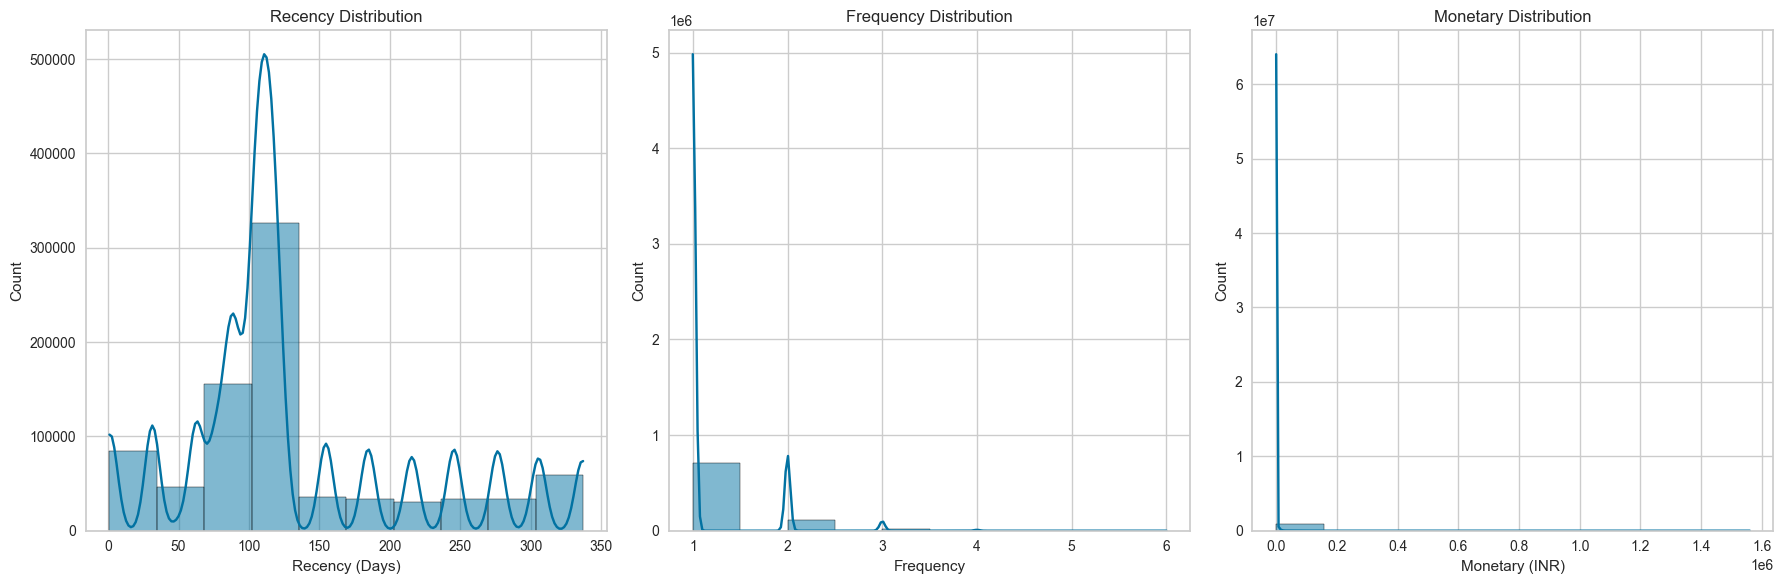

In [81]:
# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Recency
#The x-axis represents the number of days since the last purchase (recency).
#The y-axis represents the frequency of customers falling into each recency bin.
sns.histplot(RFM_data['Recency'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Recency (Days)')

# Plot Frequency
sns.histplot(RFM_data['Frequency'], bins=10, kde=True, ax=axes[1])
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Frequency')

# Plot Monetary
sns.histplot(RFM_data['Monetary'], bins=10, kde=True, ax=axes[2])
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Monetary (INR)')

plt.tight_layout()
plt.show()


Columns with non-numeric values: Index(['CustomerID'], dtype='object')


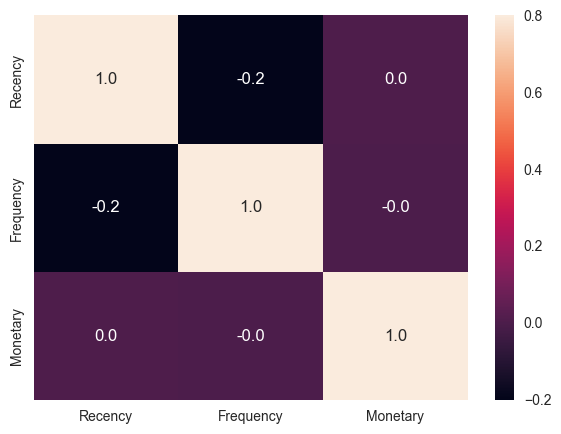

In [82]:
# Check for columns with non-numeric values
non_numeric_columns = RFM_data.select_dtypes(exclude=['float', 'int']).columns
print("Columns with non-numeric values:", non_numeric_columns)

# Handle non-numeric values (for example, by dropping those rows)
RFM_data_numeric = RFM_data.drop(columns=non_numeric_columns)

# Compute correlation matrix for numeric columns
correlation = RFM_data_numeric.corr()

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation, vmin=None, vmax=0.8, annot=True, fmt='.1f', cbar=True)
plt.show()


Ranking Customer’s based upon their recency, frequency, and monetary score

In [83]:
RFM_data['R_rank']= RFM_data['Recency'].rank(ascending=False)
RFM_data['F_rank']= RFM_data['Frequency'].rank(ascending=True)
RFM_data['M_rank']= RFM_data['Monetary'].rank(ascending=True)
RFM_data

CustomerID  Recency  Frequency  Monetary    R_rank    F_rank    M_rank
0        C1010011       75          2    2553.0  694790.5  766754.5  747439.5
1        C1010012      118          1    1499.0  289980.5  355093.0  668875.5
2        C1010014      155          2     727.5  201199.5  766754.5  528478.0
3        C1010018       86          1      30.0  651103.0  355093.0   41309.5
4        C1010024      114          1    5000.0  358622.0  355093.0  798381.0
...           ...      ...        ...       ...       ...       ...       ...
839076   C9099836      155          1     691.0  201199.5  355093.0  516501.5
839077   C9099877       86          1     222.0  651103.0  355093.0  262241.0
839078   C9099919      114          1     126.0  358622.0  355093.0  167448.0
839079   C9099941      104          1      50.0  515941.0  355093.0   73354.5
839080   C9099956       76          1     855.0  685613.5  355093.0  559673.5

[839081 rows x 7 columns]

In [84]:
# normalizing the rank of the customers
RFM_data['R_rank_norm'] = (RFM_data['R_rank'] / RFM_data['R_rank'].max()) * 100
RFM_data['F_rank_norm'] = (RFM_data['F_rank'] / RFM_data['F_rank'].max()) * 100
RFM_data['M_rank_norm'] = (RFM_data['M_rank'] / RFM_data['M_rank'].max()) * 100

RFM_data.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

RFM_data.head()


CustomerID  Recency  Frequency  Monetary  R_rank_norm  F_rank_norm  \
0   C1010011       75          2    2553.0    83.768387    91.380544   
1   C1010012      118          1    1499.0    34.961904    42.319402   
2   C1010014      155          2     727.5    24.257899    91.380544   
3   C1010018       86          1      30.0    78.501143    42.319402   
4   C1010024      114          1    5000.0    43.237762    42.319402   

   M_rank_norm  
0    89.078349  
1    79.715248  
2    62.982954  
3     4.923184  
4    95.149455

Calculating RFM score
rfm score formula: 0.15* recency score+ 0.28 frequency score + 0.57* monetary score

In [85]:
RFM_data['RFM_Score'] = 0.15*RFM_data['R_rank_norm']+0.28 * RFM_data['F_rank_norm']+0.57*RFM_data['M_rank_norm']
RFM_data['RFM_Score']

0         88.926469
1         62.531409
2         65.125521
3         26.430819
4         72.570286
            ...    
839076    50.574820
839077    41.439019
839078    29.710084
839079    26.163283
839080    62.268165
Name: RFM_Score, Length: 839081, dtype: float64

In [86]:
RFM_data['RFM_Score']*=0.05
RFM_data = RFM_data.round(2)

In [87]:
RFM_data

CustomerID  Recency  Frequency  Monetary  R_rank_norm  F_rank_norm  \
0        C1010011       75          2    2553.0        83.77        91.38   
1        C1010012      118          1    1499.0        34.96        42.32   
2        C1010014      155          2     727.5        24.26        91.38   
3        C1010018       86          1      30.0        78.50        42.32   
4        C1010024      114          1    5000.0        43.24        42.32   
...           ...      ...        ...       ...          ...          ...   
839076   C9099836      155          1     691.0        24.26        42.32   
839077   C9099877       86          1     222.0        78.50        42.32   
839078   C9099919      114          1     126.0        43.24        42.32   
839079   C9099941      104          1      50.0        62.21        42.32   
839080   C9099956       76          1     855.0        82.66        42.32   

        M_rank_norm  RFM_Score  
0             89.08       4.45  
1             79.72       3.13  
2             62.98       3.26  
3              4.92       1.32  
4             95.15       3.63  
...             ...        ...  
839076        61.56       2.53  
839077        31.25       2.07  
839078        19.96       1.49  
839079         8.74       1.31  
839080        66.70       3.11  

[839081 rows x 8 columns]

Rating Customer based upon the RFM score
1. rfm score >4.5 : Top Customer
2. 4.5 > rfm score > 4 : High Value Customer
3. 4>rfm score >3 : Medium value customer
4. 3>rfm score>1.6 : Low-value customer
5. rfm score<1.6 :Lost Customer

In [88]:
RFM_data["Customer_segment"] = np.where(RFM_data['RFM_Score'] > 4.5, "Top Customers", 
                                       (np.where(RFM_data['RFM_Score'] > 4, "High value Customer",
                                                 (np.where(RFM_data['RFM_Score'] > 3, "Medium Value Customer",
                                                           np.where(RFM_data['RFM_Score'] > 1.6, 
                                                                    'Low Value Customers', 'Lost Customers'))))))
RFM_data[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)


CustomerID  RFM_Score       Customer_segment
0    C1010011       4.45    High value Customer
1    C1010012       3.13  Medium Value Customer
2    C1010014       3.26  Medium Value Customer
3    C1010018       1.32         Lost Customers
4    C1010024       3.63  Medium Value Customer
5    C1010028       2.67    Low Value Customers
6    C1010031       3.32  Medium Value Customer
7    C1010035       3.00    Low Value Customers
8    C1010036       1.88    Low Value Customers
9    C1010037       3.94  Medium Value Customer
10   C1010038       1.25         Lost Customers
11   C1010039       2.58    Low Value Customers
12   C1010041       4.79          Top Customers
13   C1010045       1.76    Low Value Customers
14   C1010046       4.58          Top Customers
15   C1010050       1.78    Low Value Customers
16   C1010060       3.86  Medium Value Customer
17   C1010064       3.31  Medium Value Customer
18   C1010065       2.55    Low Value Customers
19   C1010066       2.90    Low Value Customers

Visualizing the customer segments

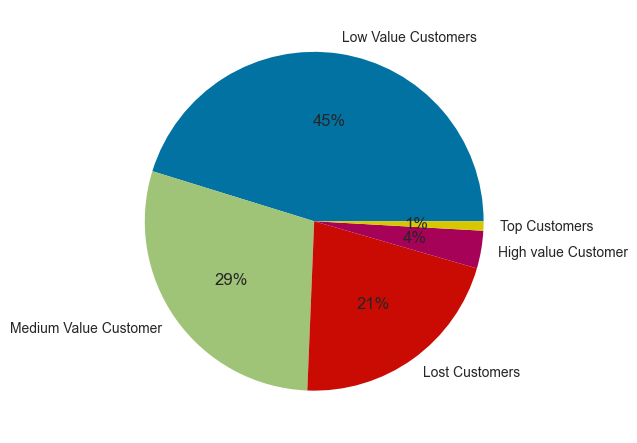

In [89]:
plt.pie(RFM_data['Customer_segment'].value_counts(),
        labels=RFM_data['Customer_segment'].value_counts().index,
        autopct='%.0f%%')
plt.show()


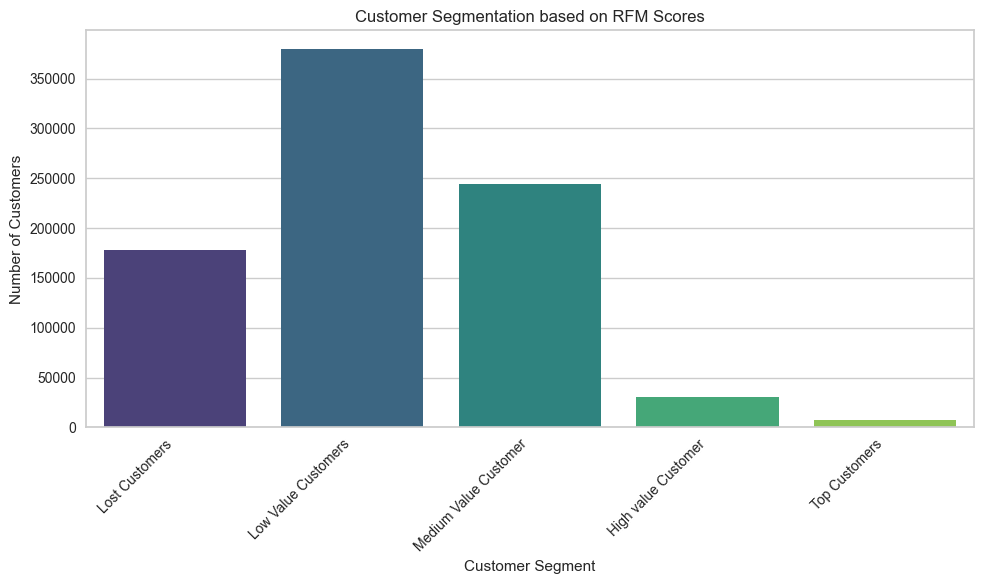

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a countplot of customer segments
sns.countplot(data=RFM_data, x='Customer_segment', order=['Lost Customers', 'Low Value Customers', 'Medium Value Customer', 'High value Customer', 'Top Customers'], palette='viridis')

# Add labels and title
plt.title('Customer Segmentation based on RFM Scores')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [92]:
RFM_data

CustomerID  Recency  Frequency  Monetary  R_rank_norm  F_rank_norm  \
0        C1010011       75          2    2553.0        83.77        91.38   
1        C1010012      118          1    1499.0        34.96        42.32   
2        C1010014      155          2     727.5        24.26        91.38   
3        C1010018       86          1      30.0        78.50        42.32   
4        C1010024      114          1    5000.0        43.24        42.32   
...           ...      ...        ...       ...          ...          ...   
839076   C9099836      155          1     691.0        24.26        42.32   
839077   C9099877       86          1     222.0        78.50        42.32   
839078   C9099919      114          1     126.0        43.24        42.32   
839079   C9099941      104          1      50.0        62.21        42.32   
839080   C9099956       76          1     855.0        82.66        42.32   

        M_rank_norm  RFM_Score       Customer_segment  
0             89.08       4.45    High value Customer  
1             79.72       3.13  Medium Value Customer  
2             62.98       3.26  Medium Value Customer  
3              4.92       1.32         Lost Customers  
4             95.15       3.63  Medium Value Customer  
...             ...        ...                    ...  
839076        61.56       2.53    Low Value Customers  
839077        31.25       2.07    Low Value Customers  
839078        19.96       1.49         Lost Customers  
839079         8.74       1.31         Lost Customers  
839080        66.70       3.11  Medium Value Customer  

[839081 rows x 9 columns]

# Data Preprocessing

## Encoding

In [93]:
oh = pd.get_dummies(data["CustGender"], drop_first=True, prefix="CustGender")
oh = oh.astype(int)
data = pd.concat([data, oh], axis=1)
data.drop(columns=["CustGender"], inplace=True)

In [ ]:
data

TransactionID CustomerID CustomerDOB   CustLocation  \
0                  T1   C5841053  1994-10-01     JAMSHEDPUR   
1                  T2   C2142763  2057-04-04        JHAJJAR   
2                  T3   C4417068  1996-11-26         MUMBAI   
3                  T4   C5342380  2073-09-14         MUMBAI   
4                  T5   C9031234  1988-03-24    NAVI MUMBAI   
...               ...        ...         ...            ...   
1048562      T1048563   C8020229  1990-08-04      NEW DELHI   
1048563      T1048564   C6459278  1992-02-20         NASHIK   
1048564      T1048565   C6412354  1989-05-18      HYDERABAD   
1048565      T1048566   C6420483  1978-08-30  VISAKHAPATNAM   
1048566      T1048567   C8337524  1984-05-03           PUNE   

         CustAccountBalance TransactionDate  TransactionTime  \
0                  17819.05      2016-02-08           143207   
1                   2270.69      2016-02-08           141858   
2                  17874.44      2016-02-08           142712   
3                 866503.21      2016-02-08           142714   
4                   6714.43      2016-02-08           181156   
...                     ...             ...              ...   
1048562             7635.19      2016-09-18           184824   
1048563            27311.42      2016-09-18           183734   
1048564           221757.06      2016-09-18           183313   
1048565            10117.87      2016-09-18           184706   
1048566            75734.42      2016-09-18           181222   

         TransactionAmount (INR)  BirthYear  TransactionYear  \
0                           25.0       1994             2016   
1                        27999.0       1957             2016   
2                          459.0       1996             2016   
3                         2060.0       1973             2016   
4                         1762.5       1988             2016   
...                          ...        ...              ...   
1048562                    799.0       1990             2016   
1048563                    460.0       1992             2016   
1048564                    770.0       1989             2016   
1048565                   1000.0       1978             2016   
1048566                   1166.0       1984             2016   

         TransactionMonth  TransactionDay  TransactionDoWeek  \
0                       2               8                  0   
1                       2               8                  0   
2                       2               8                  0   
3                       2               8                  0   
4                       2               8                  0   
...                   ...             ...                ...   
1048562                 9              18                  6   
1048563                 9              18                  6   
1048564                 9              18                  6   
1048565                 9              18                  6   
1048566                 9              18                  6   

         TransactionHourOfDay TransactionTimeOfDay  CustomerAge  \
0                          16            Afternoon           22   
1                          16            Afternoon           59   
2                          16            Afternoon           20   
3                          16            Afternoon           43   
4                           3              Morning           28   
...                       ...                  ...          ...   
1048562                     4              Morning           26   
1048563                     4              Morning           24   
1048564                     3              Morning           27   
1048565                     4              Morning           38   
1048566                     3              Morning           32   

        TransactionDate1 TransactionDate2  CustGender_M  
0             2016-02-08       2016-02-08             0  
1             2016-02-0

## Feature Selection

In [94]:
modeling_data = pd.merge(data[['CustomerID', 'CustGender_M', 'CustAccountBalance', 'CustomerAge']],
                  RFM_data[['CustomerID', 'RFM_Score']],
                  on='CustomerID',
                  how='inner') 

In [137]:
cat_data=pd.merge(data[['CustomerID', 'CustLocation','CustGender_M', 'CustAccountBalance', 'CustomerAge']],
                  RFM_data[['CustomerID', 'RFM_Score']],
                  on='CustomerID',
                  how='inner') 

In [95]:
modeling_data.drop(columns=['CustomerID'], inplace=True)

In [138]:
cat_data.drop(columns=['CustomerID'], inplace=True)

In [96]:
modeling_data

CustGender_M  CustAccountBalance  CustomerAge  RFM_Score
0                  0            17819.05           22       0.73
1                  1             2270.69           59       3.46
2                  0            17874.44           20       2.03
3                  0           866503.21           43       3.79
4                  1             3195.78           37       3.79
...              ...                 ...          ...        ...
985317             1              464.87           36       3.79
985318             1             1212.70           24       3.47
985319             1             7635.19           26       3.05
985320             1            27311.42           24       2.60
985321             1            10117.87           38       3.21

[985322 rows x 4 columns]

In [180]:
sampled_data = modeling_data.sample(n=10000, random_state=42) 

In [165]:
cat_data = cat_data.sample(n=10000, random_state=42) 

In [181]:
sampled_data.corr()

CustGender_M  CustAccountBalance  CustomerAge  RFM_Score
CustGender_M            1.000000           -0.006410     0.032471  -0.064332
CustAccountBalance     -0.006410            1.000000     0.117604   0.052402
CustomerAge             0.032471            0.117604     1.000000   0.211256
RFM_Score              -0.064332            0.052402     0.211256   1.000000

In [166]:
cat_data

CustLocation  CustGender_M  CustAccountBalance  CustomerAge  RFM_Score
658616    NEW DELHI             0            22164.91           24       3.62
359128        NOIDA             1             2136.11           22       2.49
617814      BIJAPUR             1            14144.57           25       1.28
500747  KRISHNAGIRI             1               59.85           25       1.10
339540        NOIDA             1                3.36           26       2.65
...             ...           ...                 ...          ...        ...
592938  NAVI MUMBAI             1            12350.61           33       2.79
575391     WARANGAL             0             2688.66           22       1.24
527689    SANGAMNER             1            12720.96           27       2.03
394340       MUMBAI             1           635873.84           51       2.53
904833     VADODARA             1            17350.88           20       2.42

[10000 rows x 5 columns]

# K prototype before Scaling 

## K prototype on cat_data(including CustomerLocation)

In [167]:
# Define the categorical indices
cat_indices = [0]  

# Initialize and fit the k-prototype clustering model
kproto = KPrototypes(n_clusters=5, init='Cao', verbose=2)
clusters = kproto.fit_predict(cat_data, categorical=cat_indices)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initia

In [168]:
# Print cluster centroids
print("Cluster Centroids:")
print(kproto.cluster_centroids_)

Cluster Centroids:
[['0.7222222222222222' '6725346.304444452' '42.22222222222222'
  '3.1338888888889063' 'MUMBAI']
 ['0.75' '2118076.357499996' '45.23684210526316' '3.2378947368421147'
  'GURGAON']
 ['0.7354166666666667' '596582.1582499981' '36.875' '3.04841666666667'
  'MUMBAI']
 ['0.5' '76021979.7450001' '68.5' '4.110000000000093' 'GURGAON']
 ['0.7213497453310697' '37122.855741723266' '30.704902376910017'
  '2.610359719864172' 'MUMBAI']]


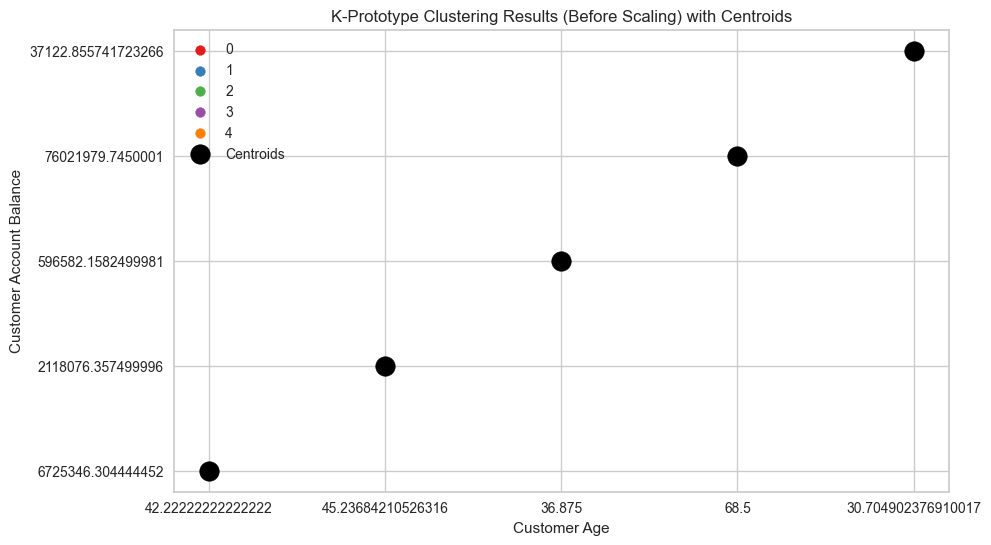

In [169]:
# Visualize clusters and centroids (2D plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cat_data['CustomerAge'], y=cat_data['CustAccountBalance'], hue=clusters, palette='Set1', legend='full')
plt.scatter(kproto.cluster_centroids_[:, 2], kproto.cluster_centroids_[:, 1], marker='o', s=200, color='black', label='Centroids')
plt.title('K-Prototype Clustering Results (Before Scaling) with Centroids')
plt.xlabel('Customer Age')
plt.ylabel('Customer Account Balance')
plt.legend()
plt.show()

In [170]:
# Compute silhouette score
silhouette_score_before_scaling = silhouette_score(cat_data[['CustAccountBalance', 'CustomerAge','RFM_Score']], clusters)
print("Silhouette Score (Before Scaling):", silhouette_score_before_scaling)

# Compute Davies-Bouldin index
davies_bouldin_score_before_scaling = davies_bouldin_score(cat_data[['CustAccountBalance', 'CustomerAge', 'RFM_Score']], clusters)
print("Davies-Bouldin Index (Before Scaling):", davies_bouldin_score_before_scaling)


Silhouette Score (Before Scaling): 0.8726650367359398
Davies-Bouldin Index (Before Scaling): 0.4658240162534054


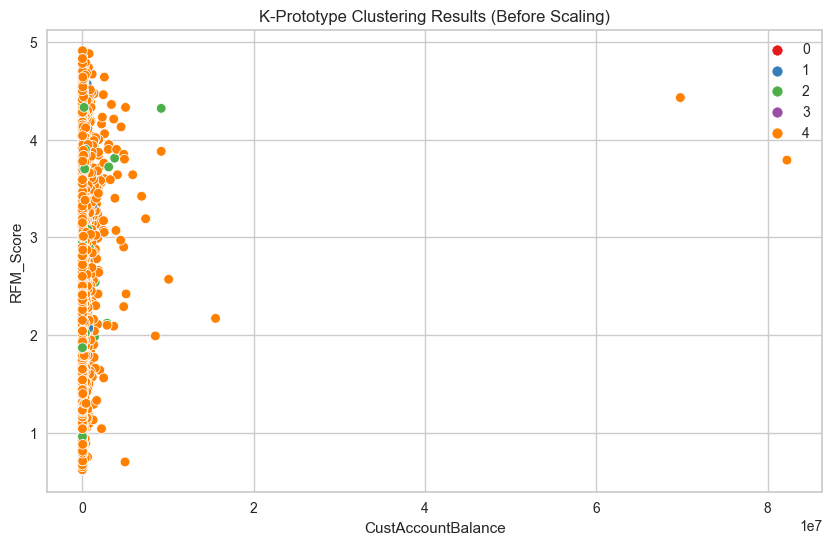

In [171]:
# Visualize clusters (2D plot)
# Assuming you have two numerical features for visualization purposes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sampled_data['CustAccountBalance'], y=cat_data['RFM_Score'], hue=clusters, palette='Set1', legend='full')
plt.title('K-Prototype Clustering Results (Before Scaling)')
plt.xlabel('CustAccountBalance')
plt.ylabel('RFM_Score')
plt.show()


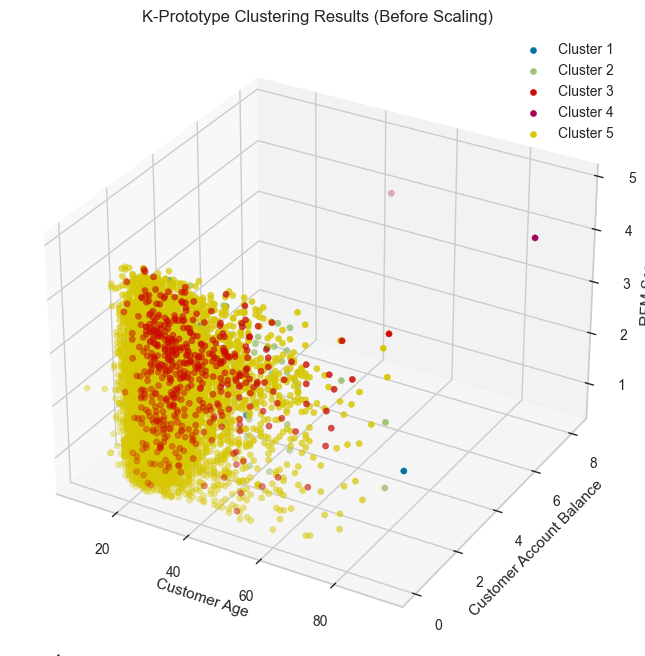

In [172]:
# Assuming you have three numerical features for visualization purposes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_id in range(5):  # Assuming 5 clusters
    ax.scatter(cat_data.loc[clusters == cluster_id, 'CustomerAge'], 
               cat_data.loc[clusters == cluster_id, 'CustAccountBalance'], 
               cat_data.loc[clusters == cluster_id, 'RFM_Score'], 
               label=f'Cluster {cluster_id + 1}')

ax.set_title('K-Prototype Clustering Results (Before Scaling)')
ax.set_xlabel('Customer Age')
ax.set_ylabel('Customer Account Balance')
ax.set_zlabel('RFM Score')
ax.legend()
plt.show()


## K-prototype after Scaling on sample_data(only numeric columns)
PCA

In [191]:
#Standardization ensures that the numerical features are on the same scale,
# which can be beneficial for the distance-based calculations used in clustering algorithms.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sampled_data)  
scaled_data = pd.DataFrame(scaled_data, columns=sampled_data.columns)  
scaled_data.head()

CustGender_M  CustAccountBalance  CustomerAge  RFM_Score
0      0.620208           -0.077115     0.429444   0.517519
1     -1.612362            3.224924     3.655671   0.801176
2      0.620208           -0.020287     0.318195   1.263433
3      0.620208           -0.089331    -0.794297  -1.110884
4      0.620208           -0.088869    -0.683048   1.841253

In [192]:
# Define the categorical indices
cat_indices = [1]  

# Initialize and fit the k-prototype clustering model
kproto = KPrototypes(n_clusters=5, init='Cao', verbose=2)
clusters = kproto.fit_predict(scaled_data, categorical=cat_indices)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3524, ncost: 15888.316027112463
Run: 1, iteration: 2/100, moves: 1961, ncost: 14110.111976803486
Run: 1, iteration: 3/100, moves: 442, ncost: 13962.061441506135
Run: 1, iteration: 4/100, moves: 135, ncost: 13957.383938538194
Run: 1, iteration: 5/100, moves: 76, ncost: 13955.49413203084
Run: 1, iteration: 6/100, moves: 82, ncost: 13952.994673879977
Run: 1, iteration: 7/100, moves: 56, ncost: 13952.116804475178
Run: 1, iteration: 8/100, moves: 22, ncost: 13951.950083582138
Run: 1, iteration: 9/100, moves: 19, ncost: 13951.836635522359
Run: 1, iteration: 10/100, moves: 13, ncost: 13951.780556054076
Run: 1, iteration: 11/100, moves: 0, ncost: 13951.780556054076
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2719, ncost: 14556.933373411586


In [193]:
# Print cluster centroids
print("Cluster Centroids:")
print(kproto.cluster_centroids_)


Cluster Centroids:
[[ 0.22090693  2.40339769  0.43933403 -0.09348282]
 [-1.61236225 -0.39607757 -0.81735194 -0.08825263]
 [ 0.62020802 -0.09755839  0.76181706 -0.09348282]
 [ 0.62020802 -0.36398128 -0.93796249 -0.09178124]
 [-1.61236225 -0.11480209  0.82206382  0.64337874]]


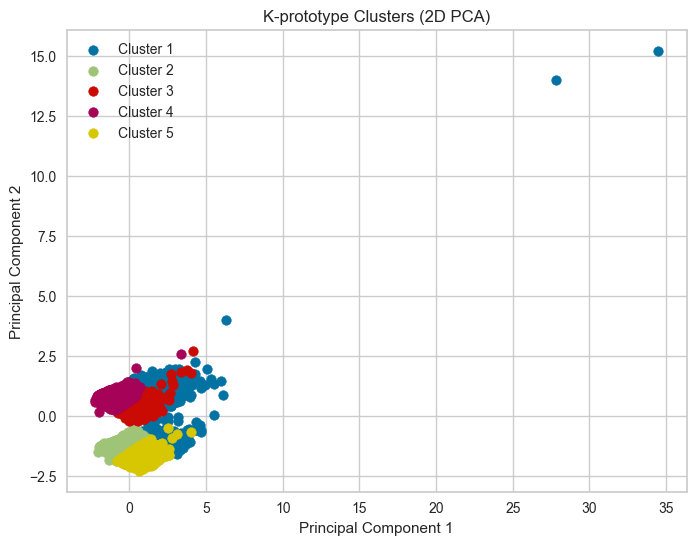

In [194]:
# Perform PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(8, 6))

for i in range(5):  # Assuming 5 clusters
    plt.scatter(pca_data[clusters == i, 0], pca_data[clusters == i, 1], label=f'Cluster {i+1}')

plt.title('K-prototype Clusters (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


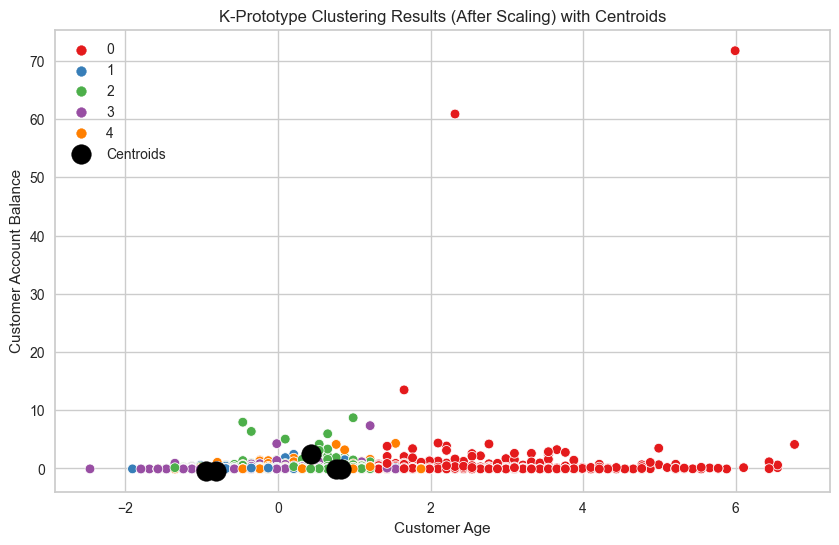

In [195]:
# Visualize clusters and centroids (2D plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data['CustomerAge'], y=scaled_data['CustAccountBalance'], hue=clusters, palette='Set1', legend='full')
plt.scatter(kproto.cluster_centroids_[:, 2], kproto.cluster_centroids_[:, 1], marker='o', s=200, color='black', label='Centroids')
plt.title('K-Prototype Clustering Results (After Scaling) with Centroids')
plt.xlabel('Customer Age')
plt.ylabel('Customer Account Balance')
plt.legend()
plt.show()


In [197]:
# Compute silhouette score
silhouette_score_before_scaling = silhouette_score(sampled_data[['CustAccountBalance', 'CustomerAge', 'RFM_Score']], clusters)
print("Silhouette Score (After Scaling):", silhouette_score_before_scaling)

# Compute Davies-Bouldin index
davies_bouldin_score_before_scaling = davies_bouldin_score(sampled_data[['CustAccountBalance', 'CustomerAge',  'RFM_Score']], clusters)
print("Davies-Bouldin Index (After Scaling):", davies_bouldin_score_before_scaling)


Silhouette Score (After Scaling): -0.2721963293110475
Davies-Bouldin Index (After Scaling): 122.42659282009069


## K Means

In [204]:
print(scaled_data.dtypes)

CustGender_M          float64
CustAccountBalance    float64
CustomerAge           float64
RFM_Score             float64
dtype: object


In [216]:
# Extract features from the DataFrame
X = scaled_data[['CustomerAge', 'RFM_Score']].values
# Remove the target variable 'TransactionAmount ' from Y
#Y = scaled_data[['CustGender_M','RFM_Score']].values

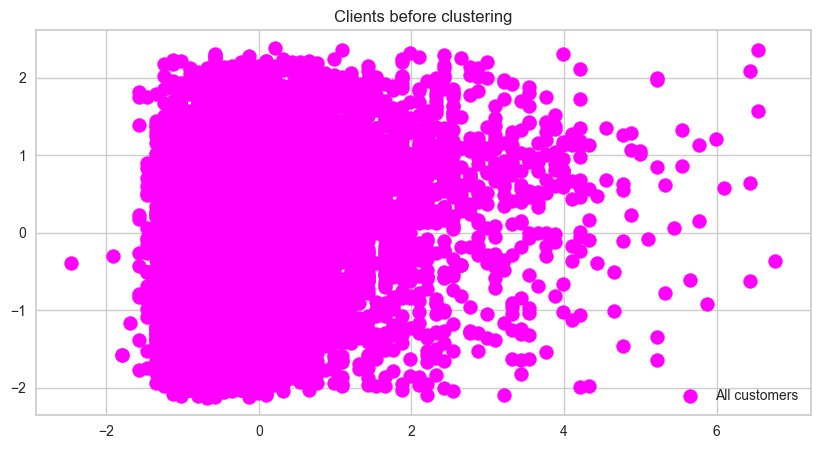

In [218]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X[:,0],X[:,1],s=100, color='magenta',label='All customers')
plt.title('Clients before clustering')

plt.legend()
plt.show()

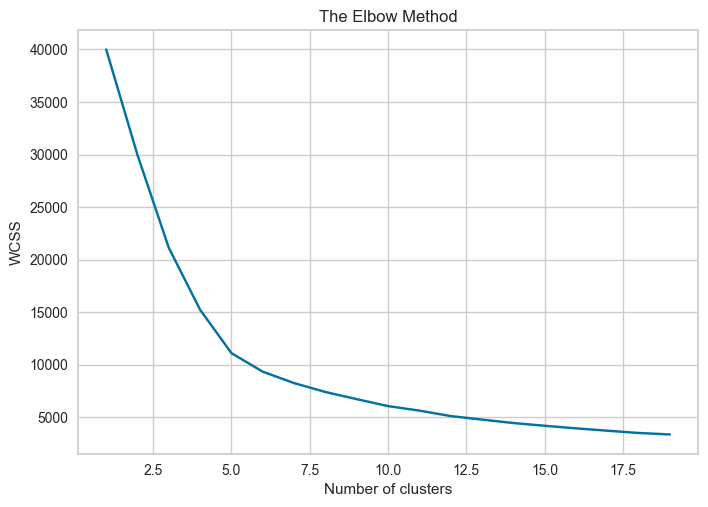

In [219]:
wcss = [] # within-cluster sum of squares (WCSS)
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [220]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [221]:
kmeans.inertia_ #sum of squared distances of samples to their own cluster centroid

4850.424349167678

In [222]:
X[y_kmeans==0]

array([[-0.34930021, -0.5120519 ],
       [-0.4605494 ,  0.58055409],
       [-0.57179859, -0.29142953],
       ...,
       [-1.35054291,  0.20234433],
       [-0.79429697,  0.39144921],
       [-0.34930021, -0.34395867]])

In [223]:
X[y_kmeans==0,0]

array([-0.34930021, -0.4605494 , -0.57179859, ..., -1.35054291,
       -0.79429697, -0.34930021])

In [224]:
kmeans.cluster_centers_

array([[-0.51753764,  0.04754003],
       [-0.10581567,  1.17924131],
       [-0.49918044, -1.21998628],
       [ 2.75460576,  0.73207071],
       [ 0.89023645, -0.12930293]])

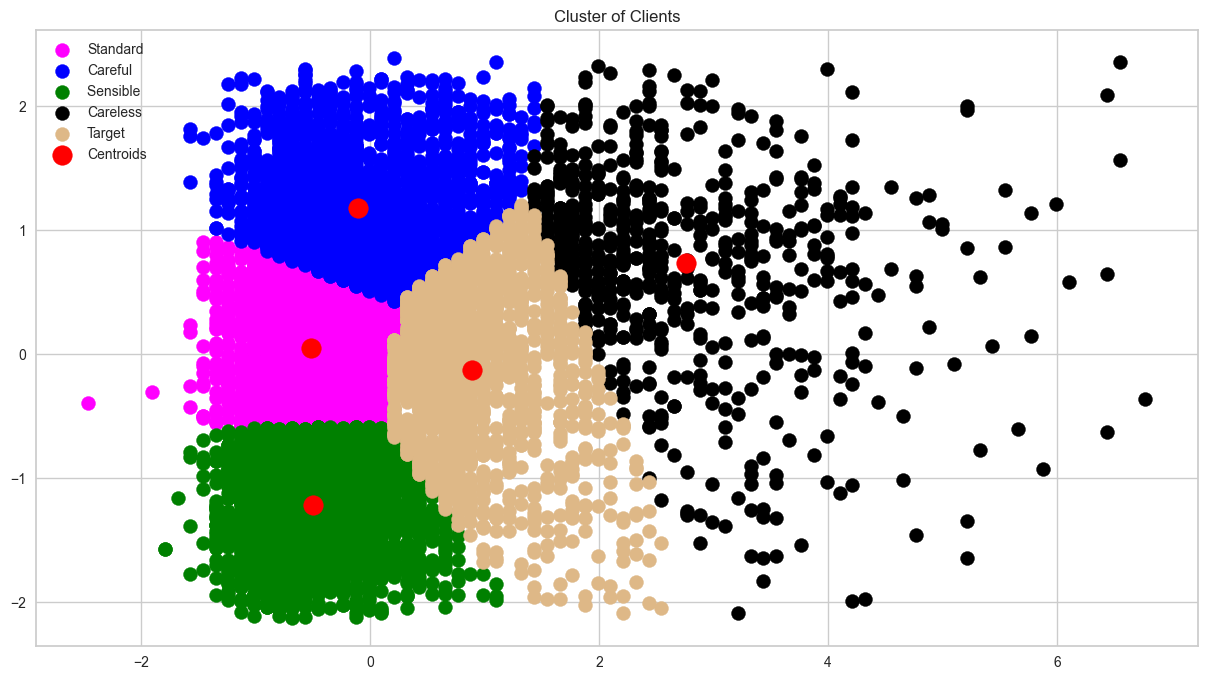

In [225]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Standard')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Careful')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Sensible ')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='black',label='Careless')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='Target')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids')
plt.title('Cluster of Clients')

plt.legend()
plt.show()

In [226]:
silhouette_avg_K_means = silhouette_score(X, y_kmeans)
print("The silhouette score is:", silhouette_avg_K_means)

The silhouette score is: 0.3576691467245923


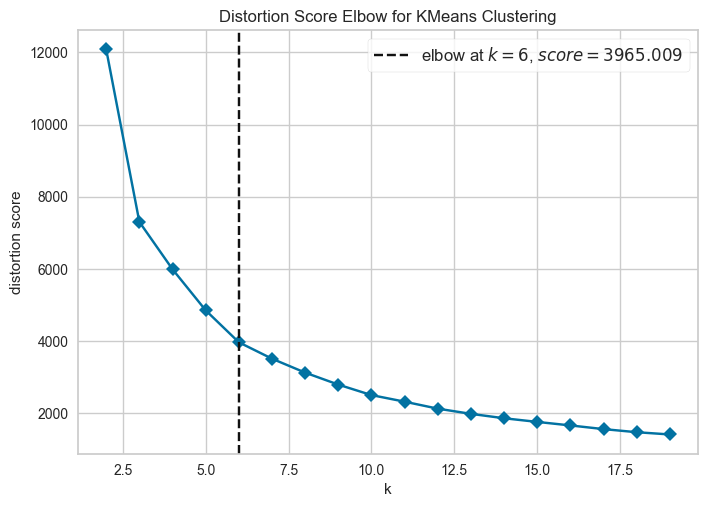

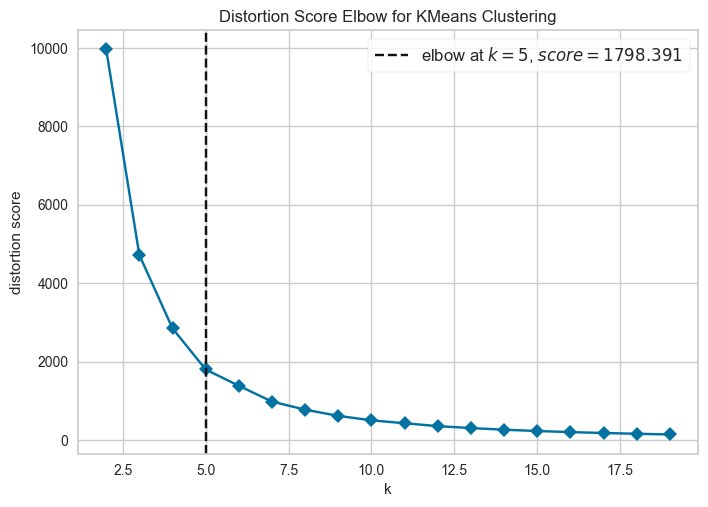

In [227]:
# Function to perform KMeans clustering and plot the elbow method
def perform_elbow_method(X, k_range, title):
    model = KMeans(init='k-means++', random_state=42, n_init=10)  # or n_init='auto'
    visualizer = KElbowVisualizer(model, k=k_range, timings=False)
    visualizer.fit(X)
    plt.title(title)
    visualizer.show()

# Perform elbow method for clustering based on 'Age'
optimal_clusters_elbow_x = perform_elbow_method(X, k_range=(2, 20), title='Elbow Method for Customer Age Clustering')

# Perform elbow method for clustering based on 'CustLocation'
optimal_clusters_elbow_y = perform_elbow_method(Y, k_range=(2, 20), title='Elbow Method for Customer Location Clustering')


In [228]:
# Print the optimal number of clusters
print("Optimal Clusters for Customer Age (Elbow):", optimal_clusters_elbow_x)
print("Optimal Clusters for Customer Location (Elbow):", optimal_clusters_elbow_y)

Optimal Clusters for Customer Age (Elbow): None
Optimal Clusters for Customer Location (Elbow): None


In [229]:
# Function to perform KMeans clustering and return the cluster labels and centroids
def perform_kmeans_clustering(X, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    cluster_centers = kmeans.cluster_centers_
    return cluster_labels, cluster_centers

x_cluster_labels, x_cluster_centers = perform_kmeans_clustering(X, num_clusters=5)
y_cluster_labels, y_cluster_centers = perform_kmeans_clustering(Y, num_clusters=6)

In [230]:
print("x_cluster_labels",x_cluster_labels)
print("x_cluster_centers",x_cluster_centers)
print("y_cluster_labels",y_cluster_labels)
print("y_cluster_centers",y_cluster_centers)

x_cluster_labels [4 3 1 ... 4 1 3]
x_cluster_centers [[-0.51753764  0.04754003]
 [-0.10581567  1.17924131]
 [-0.49918044 -1.21998628]
 [ 2.75460576  0.73207071]
 [ 0.89023645 -0.12930293]]
y_cluster_labels [1 3 5 ... 3 3 1]
y_cluster_centers [[ 0.62020802 -1.3912941 ]
 [ 0.62020802  0.4681161 ]
 [-1.61236225 -0.80935579]
 [-1.61236225  0.84096463]
 [ 0.62020802 -0.46233307]
 [ 0.62020802  1.36750126]]


In [231]:
# Add cluster labels to the DataFrame
scaled_data['cluster_age'] = x_cluster_labels
scaled_data['cluster_location'] = y_cluster_labels

# Add centroids to the DataFrame
scaled_data['cen_xx'] = scaled_data.cluster_age.map({i: x_cluster_centers[i][0] for i in range(5)})
scaled_data['cen_xy'] = scaled_data.cluster_age.map({i: x_cluster_centers[i][1] for i in range(5)})
scaled_data['cen_yx'] = scaled_data.cluster_location.map({i: y_cluster_centers[i][0] for i in range(6)})
scaled_data['cen_yy'] = scaled_data.cluster_location.map({i: y_cluster_centers[i][1] for i in range(6)})

In [232]:
scaled_data.tail(5)

CustGender_M  CustAccountBalance  CustomerAge  RFM_Score  cluster_age  \
9995      0.620208            0.455277     2.209431   0.727636            3   
9996      0.620208           -0.081431     0.874441   0.086780            4   
9997     -1.612362           -0.058502     0.763192   0.034251            4   
9998     -1.612362           -0.093274    -0.794297   1.263433            1   
9999      0.620208            0.125019     3.099425   0.832694            3   

      cluster_location    cen_xx    cen_xy    cen_yx    cen_yy  
9995                 1  2.754606  0.732071  0.620208  0.468116  
9996                 1  0.890236 -0.129303  0.620208  0.468116  
9997                 3  0.890236 -0.129303 -1.612362  0.840965  
9998                 3 -0.105816  1.179241 -1.612362  0.840965  
9999                 1  2.754606  0.732071  0.620208  0.468116

In [ ]:
# Define colors for each cluster
colors_X = ['purple', 'pink', 'magenta', 'blue', 'brown']
colors_Y = ['purple', 'pink', 'magenta', 'blue', 'brown', 'red','cyan']


# Add cluster colors to the DataFrame
scaled_data['color_age_km'] = sample_data.cluster_age.map({i: colors_X[i] for i in range(5)})
scaled_data['color_location_km'] = sample_data.cluster_location.map({i: colors_Y[i] for i in range(6)})

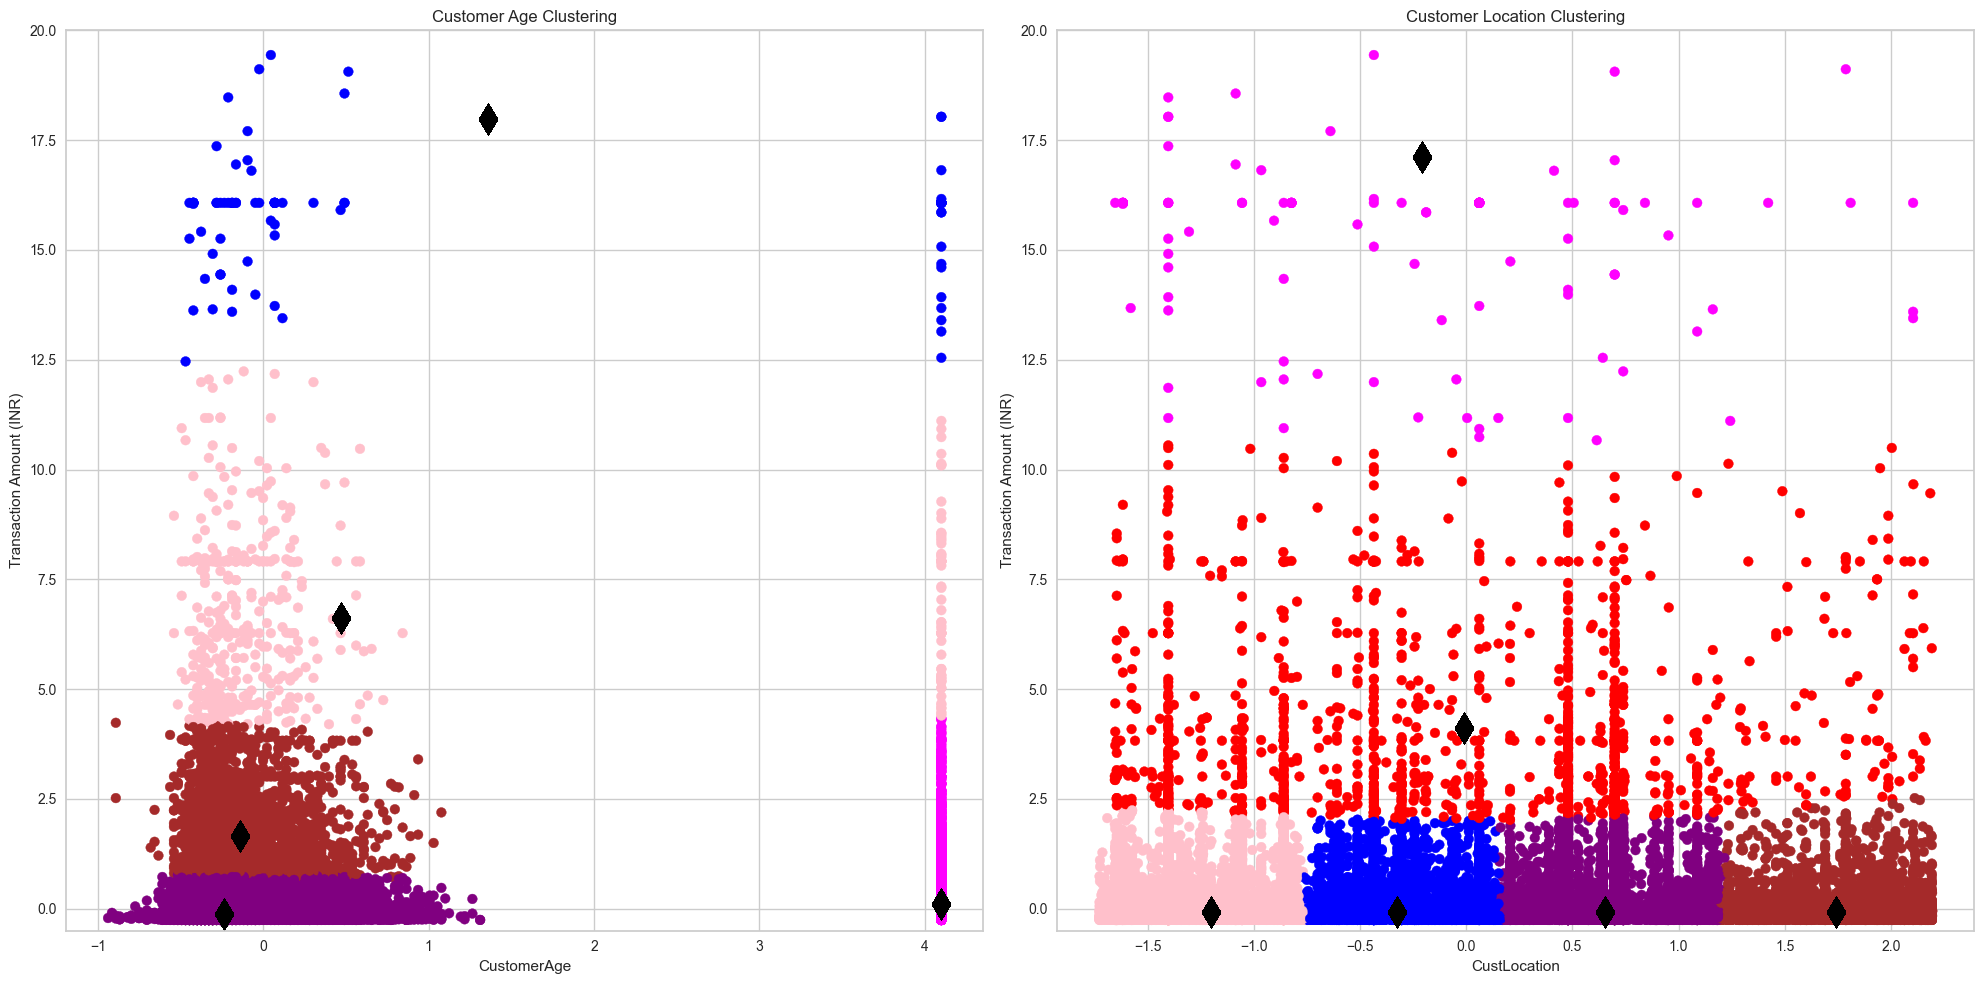

In [ ]:
# Plot the scatter plot with cluster colors and centroids for 'Customer age' and 'TransactionAmount (INR)'
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(sample_data['CustomerAge'], sample_data['Monetary'], c=sample_data.color_age_km)
plt.scatter(sample_data['cen_xx'], sample_data['cen_xy'], marker='d', s=250, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('CustomerAge')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Age Clustering')

# Plot the scatter plot with cluster colors and centroids for 'CustLocation' and 'TransactionAmount (INR)'
plt.subplot(1, 2, 2)
plt.scatter(sample_data['CustLocation'], sample_data['Monetary'], c=sample_data.color_location_km)
plt.scatter(sample_data['cen_yx'], sample_data['cen_yy'], marker='d', s=250, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('CustLocation')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Location Clustering')

plt.tight_layout()  # Adjusts the spacing between the plots
plt.show()

In [234]:
cluster_labels = kmeans.fit_predict(X)


In [236]:
# Calculate silhouette score for cluster_age
silhouette_score_age = silhouette_score(X, x_cluster_labels)


In [237]:

# Calculate silhouette score for cluster_location
silhouette_score_location = silhouette_score(Y, y_cluster_labels)


In [238]:

print("Silhouette Score for cluster_age:", silhouette_score_age)
print("Silhouette Score for cluster_location:", silhouette_score_location)

Silhouette Score for cluster_age: 0.3576691467245923
Silhouette Score for cluster_location: 0.5542935042228198


## PCA

###  PCA n=6

In [ ]:
sample_data1 = scaled_data.sample(n=10000)
pca = PCA(n_components=6)
pca_components = pca.fit_transform(sample_data1)
pca_components = pd.DataFrame(pca_components,columns=['PC1','PC2', 'PCA3', 'PCA4', 'PCA5', 'PCA6'])
pca_components.head()

PC1       PC2      PCA3      PCA4      PCA5      PCA6
0  0.673208 -0.157904 -0.247998 -0.307373  0.512792 -1.554009
1 -0.009015  0.005379 -1.677945  0.516431  0.552841 -0.780764
2 -0.563627 -0.935633  1.746860  0.400706 -0.772044 -0.528572
3 -0.068639 -0.071992 -0.731475 -0.025044  0.563508 -0.752068
4 -0.348451 -0.178908  0.125920 -0.547627  0.601872 -0.493578

In [ ]:
base_spectral = SpectralClustering(random_state=101)

In [ ]:
base_spectral.fit(pca_components)

SpectralClustering(random_state=101)

In [ ]:
print("Estimated number of clusters:",len(set(base_spectral.labels_)))
print("Clusters:",set(base_spectral.labels_))

Estimated number of clusters: 2
Clusters: {0, 1}


In [ ]:
pca_components['Cluster'] = base_spectral.labels_
print("Silhouette Score:",str(np.round(silhouette_score(pca_components,pca_components.Cluster)*100,2)) + '%')

Silhouette Score: 95.44%


<Axes: xlabel='PC1', ylabel='PC2'>

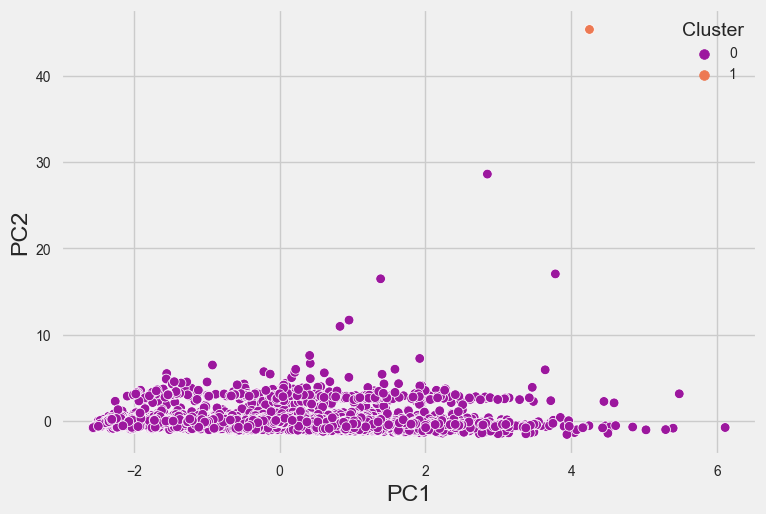

In [ ]:
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='plasma', data=pca_components)


<Axes: xlabel='Cluster'>

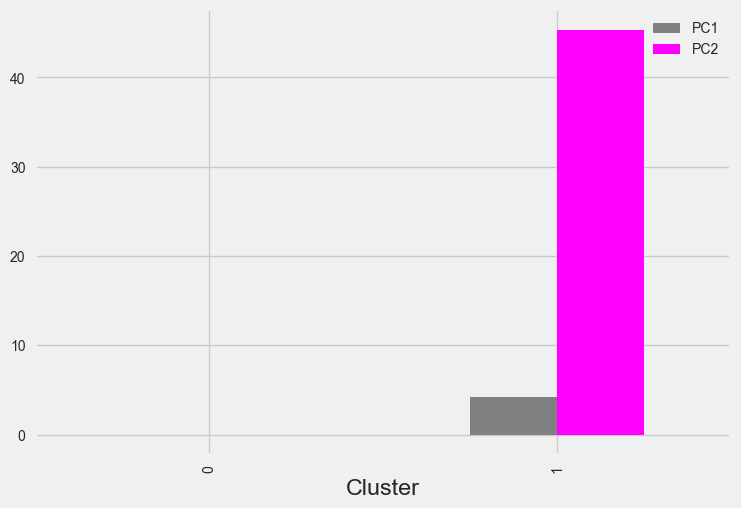

In [ ]:
pca_components.groupby('Cluster')[['PC1','PC2']].mean().plot(kind='bar',color=['grey','magenta'])

## Spectral Clustering

In [ ]:
sample_data1 = scaled_data.sample(n=10000)

In [ ]:

base_spectral = SpectralClustering(random_state=101)
base_spectral.fit(sample_data1)

SpectralClustering(random_state=101)

In [ ]:
print("Estimated number of clusters:",set(base_spectral.labels_))

Estimated number of clusters: {0, 1, 2, 4, 5, 6}


In [ ]:
print("Estimated number of noise points:",list(base_spectral.labels_).count(-1))

Estimated number of noise points: 0


In [ ]:
print("Silhouette Score:",str(np.round(silhouette_score(sample_data1,base_spectral.labels_)*100,2)) + '%')

Silhouette Score: 63.38%


<Axes: xlabel='CustAccountBalance', ylabel='Monetary'>

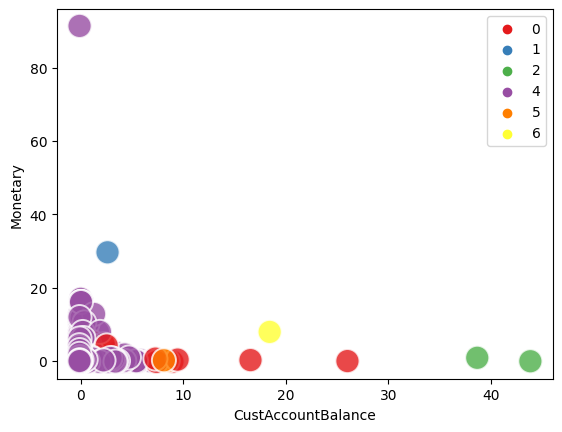

In [ ]:
sns.scatterplot(data=sample_data1,x='CustAccountBalance',y='Monetary',hue=base_spectral.labels_,s=300,alpha=0.8,palette='Set1')